# Исследование закономерностей, определяющих успешность игр

**Цель исследования**: 

C помощью открытых исторических данных о продажах игр, оценок пользователей и экспертов, жанрах и платформах (например, Xbox или PlayStation) выявить определяющие успешность игр закономерности. Информация будет использована заказчиком - интернет-магазин "Стримчик" - для оценки потенциально популярных продуктов и планирования маркетинговых кампаний.

**Ход исследования**:

Данные представлены в виде таблицы games.csv. Они содержат информацию о продажах игр, оценках пользователей и экспертов, жанров и игровых платформ выпуска, все данные датированы 2016-ым годом и ранее. При обзоре данных будет совершена проверка на возможные ошибки, которые могут помешать исследованию. После будет совершена предобработка данных с целью исправления ошибок и обработки пропущенных значений, при необходимости буду изменены типы данных и расчитаны дополнительные параметры. Затем на основе обработанных данных будет проведён исследовательский анализ данных, на основе которого будет составлен портрет пользователя из основных регионов. После будет совершена проверка сформированных заказчиком гипотез:

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
2. Средние пользовательские рейтинги жанров Action и Sports отличаются.

По результатам будет сформирован общий вывод.

Таким образом, исследование пройдёт в шесть этапов: <a id='0'></a>

1. [**Обзор данных**](#1)

Произведем первичный обзор данных из файла games.csv. При обзоре будет совершена проверка на возможные ошибки, которые могут помещать исследованию.

2. [**Предобработка данных**](#2)

После обзора данных будет совершена их предобработка с целью исправления ошибок и обработки пропущенных значений, при необходимости буду изменены типы данных.

3. [**Исследовательский анализ данных**](#3)

На основе обработанных данных проведем исследовательский анализ для понимания распределения данных в датасете.

4. [**Составление портрета пользователя каждого региона**](#4)

Используя наблюдения из исследовательского анализа, мы составим портрет среднего пользователя из трех рассматриваемых регионов (NA, EU, JP).

5. [**Проверка гипотез**](#5)

После будет совершена проверка сформированных заказчиком гипотез:

1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

2) Средние пользовательские рейтинги жанров Action и Sports отличаются.

6. [**Общий вывод**](#6)

Общий вывод по проделанной работе и полученным наблюдениям.

<a id='1'></a>
## Обзор данных

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid", palette="dark:salmon_r")
pd.options.display.float_format = '{:,.2f}'.format
pd.options.mode.chained_assignment = None

plt.rcParams.update({'axes.labelsize': 10,'axes.titlesize': 15})

In [2]:
raw_data = pd.read_csv('/datasets/games.csv')
raw_data.sample(10, random_state=0).T

,7634,13771,3051,15726,578,14668,10421,10231,12163,1090
Name,Press Your Luck 2010 Edition,Aeon Flux,Castlevania: Lords of Shadow,Prince of Stride,Final Fantasy XIII-2,World of Zoo,Gravity Games Bike: Street Vert Dirt,Calling,Titanic Mystery,PGR: Project Gotham Racing 2
Platform,DS,PS2,X360,PSV,PS3,PC,PS2,Wii,DS,XB
Year_of_Release,"2,009.00","2,005.00","2,010.00","2,015.00","2,011.00","2,009.00","2,002.00","2,009.00","2,010.00","2,003.00"
Genre,Misc,Action,Action,Adventure,Role-Playing,Simulation,Sports,Adventure,Puzzle,Racing
NA_sales,0.18,0.02,0.42,0.00,0.78,0.00,0.05,0.06,0.05,0.97
EU_sales,0.00,0.02,0.17,0.00,0.73,0.02,0.04,0.04,0.01,0.59
JP_sales,0.00,0.00,0.01,0.02,0.89,0.00,0.00,0.00,0.00,0.04
Other_sales,0.01,0.01,0.05,0.00,0.23,0.01,0.01,0.01,0.01,0.07
Critic_Score,NaN,66.00,83.00,NaN,79.00,NaN,24.00,49.00,NaN,NaN
User_Score,tbd,5.8,7.8,NaN,6.6,8.4,4.1,6.7,tbd,NaN


'Хронологический диапазон данных - от 1980.0 до 2016.0'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


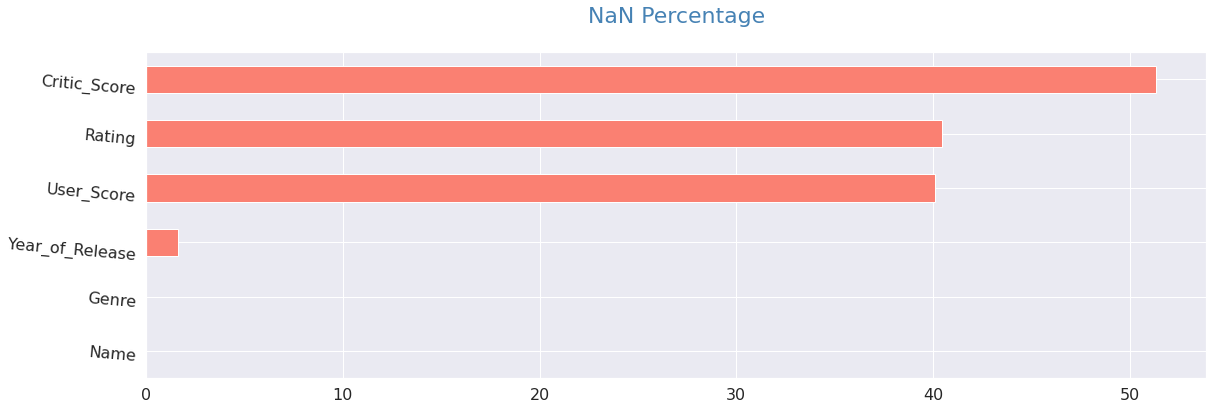

In [3]:
min_year = raw_data['Year_of_Release'].min()
max_year = raw_data['Year_of_Release'].max()
display(f'Хронологический диапазон данных - от {min_year} до {max_year}')

raw_data.info()

def pass_value_barh(data):
    try:
        (
            (data.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('NaN Percentage' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('Пропусков не осталось')
        
pass_value_barh(raw_data)

In [4]:
display(raw_data.describe())

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,"16,446.00","16,715.00","16,715.00","16,715.00","16,715.00","8,137.00"
mean,"2,006.48",0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,"1,980.00",0.00,0.00,0.00,0.00,13.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00


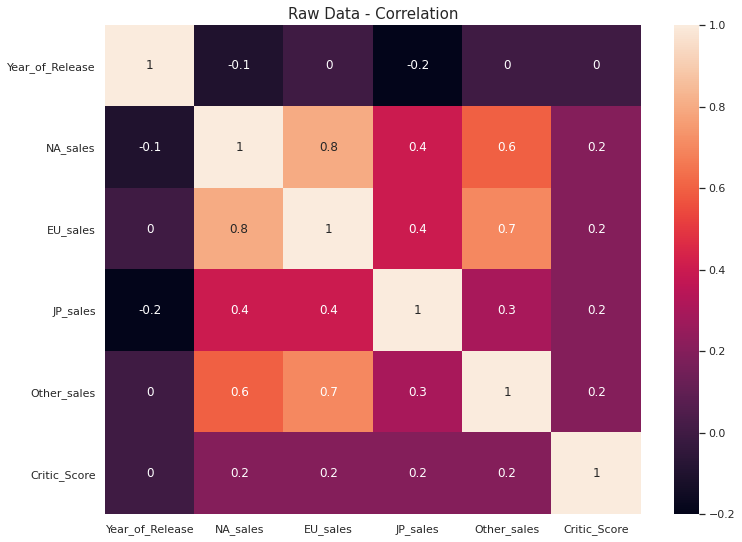

In [5]:
# Первичные корреляции и их визуализация через heatmap:
plt.figure(figsize=(12,9))
sns.heatmap(round(raw_data.corr(), 1), annot=True)
plt.title('Raw Data - Correlation')
plt.show()

< Описание данных >:

Согласно информации от заказчика, данные за 2016 год могут быть неполные. 

Список столбцов:

 - `Name` — название игры
 - `Platform` — платформа
 - `Year_of_Release` — год выпуска
 - `Genre` — жанр игры
 - `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
 - `EU_sales` — продажи в Европе (миллионы проданных копий)
 - `JP_sales` — продажи в Японии (миллионы проданных копий)
 - `Other_sales` — продажи в других странах (миллионы проданных копий)
 - `Critic_Score` — оценка критиков (максимум 100)
 - `User_Score` — оценка пользователей (максимум 10)
 - `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Обзор данных - Выводы и наблюдения:

- Хронологический диапазон исследуемых данных - от 1980 до 2016 года.


- Названия столбцов датасета написаны с использованием разных регистров - принято решение заменить регистр для всех названий столбцов на snake_case для упрощения индексации.


- Шесть из одиннадцати столбцов содержат пропуски - если часть этих пропусков (`Name`, `Year_of_Release`, `Genre`) можно обьяснить несвязанными техническими ошибками (пропущен жанр/название игры, игра еще не выпущена, и т.п.), то пропуски в других столбцах (`Critic_Score`, `User_Score`, `Rating`) и их обьем наводят на мысль о взаимосвязанной и/или структурной природе пропусков, которую нужно исследовать подробнее.


- Столбец `Year_of_Release` содержит тип данных `float` - возможно, что целесообразно заменить на целые числа (`int`); если же тип данных соответствует данным (часть после точки обозначает месяц/часть года выпуска), то будет целесообразным разделить на отдельные столбцы.


- `Critic_Score` содержит дробные числа, хотя рейтинги не содержат знаки после запятой - принято решение заменить тип данных на int.


- `User_Score` содержит числовые данные в типе данных object - принято решение заменить тип данных на `float`.


- Для экономии памяти мы заменим тип данных в столбцах после изучения их содержимого.

<a id='2'></a>
## Предобработка данных

[*Вернуться к оглавлению*](#0)

Начнем предобработку с переименования столбцов в варианте датасета для предобработки:

In [6]:
filt_data = raw_data.copy()

filt_data.columns = filt_data.columns.str.lower()

filt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Создадим функции для облегчения процесса предобработки:

In [7]:
# функция "overview" выведет описательную статистику данных столбца.
# если есть пропуски - выведет их количество и процентную долю от общего числа значений
# а также корреляцию с другими данными 
col = filt_data.columns.tolist() # список названий столбцов

def filt_overview(index):
    column = filt_data[col[index]]
    na = column.isna().sum() # количество пропусков
    
    print(column.describe()) # описательная статистика
    print(f'data type - {column.dtypes}') # тип данных столбца
    
    if na > 1: # если есть пропуски:
        
        print()
        print(f'cells with missing data = {na}') # количества пропусков, если они есть
        print(f'missing data share = {round(na/len(column)*100, 2)}%') # доля пропусков в %
        
        if column.dtypes != 'O' and column.dtypes != 'object': # если у данных числовой тип:
            corr = (filt_data.corr()[col[index]].sort_values(ascending=False).head()) # корреляция с данными других столбцов
            corr.plot(title='dataset correlation', figsize=[12,5], style='mo:') # простой график корреляции
            plt.grid(visible=True)
            plt.show()

# опробуем функцию overview на столбце с названиями игр

try:
    filt_overview(0)
    
except:
    print('Функция не сработала.')

count                           16713
unique                          11559
top       Need for Speed: Most Wanted
freq                               12
Name: name, dtype: object
data type - object

cells with missing data = 2
missing data share = 0.01%


Столбец `name` содержит данные о названии игр в датасете. Из работы функции `describe()` видно, что из 16713 строк только 2/3 составляют уникальные названия, а оставшаяся треть - дубликаты. Рассмотрим три самые часто встречаемые значения:

In [8]:
filt_data['name'].value_counts().head(10)

Need for Speed: Most Wanted     12
LEGO Marvel Super Heroes         9
FIFA 14                          9
Madden NFL 07                    9
Ratatouille                      9
Lego Batman 3: Beyond Gotham     8
Cars                             8
LEGO Jurassic World              8
FIFA 15                          8
Angry Birds Star Wars            8
Name: name, dtype: int64

In [9]:
filt_data.loc[filt_data['name'] == 'Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,"2,005.00",Racing,2.03,1.79,0.08,0.47,82.00,9.1,T
523,Need for Speed: Most Wanted,PS3,"2,012.00",Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,"2,012.00",Racing,0.62,0.78,0.01,0.15,83.00,8.5,T
1591,Need for Speed: Most Wanted,X360,"2,005.00",Racing,1.00,0.13,0.02,0.10,83.00,8.5,T
1998,Need for Speed: Most Wanted,XB,"2,005.00",Racing,0.53,0.46,0.00,0.05,83.00,8.8,T
2048,Need for Speed: Most Wanted,PSV,"2,012.00",Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,"2,005.00",Racing,0.43,0.11,0.00,0.02,80.00,9.1,T
5972,Need for Speed: Most Wanted,PC,"2,005.00",Racing,0.02,0.23,0.00,0.04,82.00,8.5,T
6273,Need for Speed: Most Wanted,WiiU,"2,013.00",Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,"2,005.00",Racing,0.24,0.01,0.00,0.02,45.00,6.1,E


In [10]:
filt_data.loc[filt_data['name'] == 'Madden NFL 07']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
241,Madden NFL 07,PS2,"2,006.00",Sports,3.63,0.24,0.01,0.61,84.00,8.2,E
972,Madden NFL 07,X360,"2,006.00",Sports,1.66,0.00,0.01,0.13,80.00,6,E
2035,Madden NFL 07,XB,"2,006.00",Sports,0.97,0.03,0.00,0.03,83.00,8.7,E
2479,Madden NFL 07,PSP,NaN,Sports,0.77,0.03,0.00,0.04,78.00,6.6,E
3229,Madden NFL 07,GC,"2,006.00",Sports,0.48,0.13,0.00,0.02,82.00,9.2,E
3838,Madden NFL 07,PS3,"2,006.00",Sports,0.47,0.00,0.01,0.04,76.00,4.2,E
4006,Madden NFL 07,Wii,"2,006.00",Sports,0.46,0.00,0.00,0.04,81.00,8,E
7372,Madden NFL 07,DS,"2,006.00",Sports,0.20,0.00,0.00,0.02,70.00,6.5,E
14889,Madden NFL 07,GBA,"2,006.00",Sports,0.02,0.01,0.00,0.00,68.00,9.3,E


In [11]:
filt_data.loc[filt_data['name'] == 'Ratatouille']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1598,Ratatouille,DS,"2,007.00",Action,0.49,0.62,0.00,0.14,NaN,NaN,NaN
2442,Ratatouille,PS2,"2,007.00",Action,0.31,0.00,0.00,0.53,65.00,8,E
3069,Ratatouille,PSP,"2,007.00",Action,0.22,0.27,0.00,0.16,64.00,7.1,E
3902,Ratatouille,PS3,"2,007.00",Action,0.09,0.32,0.00,0.10,55.00,4.8,E
3948,Ratatouille,Wii,"2,007.00",Action,0.43,0.03,0.00,0.04,62.00,6.7,E
6398,Ratatouille,X360,"2,007.00",Action,0.23,0.02,0.00,0.02,56.00,tbd,E
7681,Ratatouille,GBA,"2,007.00",Action,0.14,0.05,0.00,0.00,65.00,tbd,E
9015,Ratatouille,GC,"2,007.00",Action,0.11,0.03,0.00,0.00,60.00,5.6,E
14514,Ratatouille,PC,"2,007.00",Action,0.01,0.01,0.00,0.00,NaN,7.9,E


Из данных выше можно сделать вывод, что дубликаты в столбце являются версиями одной игры на разных платформах: одна игра может быть выпущена на нескольких платформах одновременно, а распространенность игры Need for Speed: Most Wanted можно обьяснить наличием одновременно оригинальной игры [2005 года](https://ru.wikipedia.org/wiki/Need_for_Speed%3A_Most_Wanted) и перевыпуска той же игры для нового поколения игровых платформ в [2012 году](https://ru.wikipedia.org/wiki/Need_for_Speed:_Most_Wanted_(2012)). В примере данной игры мы можем изменить название, чтобы не путаться в версиях.

In [12]:
filt_data[filt_data['year_of_release'] > 2005] = (
    filt_data[filt_data['year_of_release'] > 2005]
    .replace('Need for Speed: Most Wanted', 
             'Need for Speed: Most Wanted (2012)')
)
filt_data.loc[filt_data['name'] == 'Need for Speed: Most Wanted (2012)']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
523,Need for Speed: Most Wanted (2012),PS3,"2,012.00",Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted (2012),X360,"2,012.00",Racing,0.62,0.78,0.01,0.15,83.00,8.5,T
2048,Need for Speed: Most Wanted (2012),PSV,"2,012.00",Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
6273,Need for Speed: Most Wanted (2012),WiiU,"2,013.00",Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
11715,Need for Speed: Most Wanted (2012),PC,"2,012.00",Racing,0.00,0.06,0.00,0.02,82.00,8.5,T


Так как кроме имени и жанра других признаков явного дублирования не наблюдается (заметно, что версии различаются в продажах и оценках), удаление дубликатов не является целесообразным для данного исследования. 

В столбце найдено 2 пропуска - рассмотрим их подробнее:

In [13]:
filt_data[filt_data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,"1,993.00",NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,"1,993.00",NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Несмотря на относительно высокий уровень продаж в Северной Америке (1.78 млн копий), других отличительных признаков недостаточно, чтобы точно определить что за название игры - принято решение строки удалить и перейти к следующему столбцу:

In [14]:
filt_data = filt_data[filt_data['name'].notna()]
filt_overview(0)

count                        16713
unique                       11560
top       LEGO Marvel Super Heroes
freq                             9
Name: name, dtype: object
data type - object


In [15]:
filt_overview(1)

count     16713
unique       31
top         PS2
freq       2161
Name: platform, dtype: object
data type - object


In [16]:
pd.pivot_table(filt_data,
               index=['platform'],
               values=['name'],
               aggfunc={'name': 'count'}
              ).sort_values(by='name', ascending=False).T

platform,PS2,DS,PS3,Wii,X360,PSP,PS,PC,XB,GBA,...,GB,DC,GEN,NG,SCD,WS,3DO,TG16,PCFX,GG
name,2161,2151,1331,1320,1262,1209,1197,974,824,822,...,98,52,27,12,6,6,3,2,1,1


Столбец содержит данные о том, на какой игровой платформа была выпущена игра. В датасете присутствуют 31 уникальная игровая платформа, явных дубликатов среди них нет. Проверим, есть ли дубликаты игр на одной игровой платформе:

In [17]:
filt_data[filt_data.duplicated(subset=['name', 'platform'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,"2,012.00",Sports,2.11,0.22,0.00,0.23,83.00,5.5,E
1745,Sonic the Hedgehog,PS3,"2,006.00",Platform,0.41,0.06,0.04,0.66,43.00,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.00,4.1,E10+
16230,Madden NFL 13,PS3,"2,012.00",Sports,0.00,0.01,0.00,0.00,83.00,5.5,E


Строки с данными по игре Need for Speed, как мы уже рассмотрели в столбце `name`, относятся к перезапуску одной и той же игры - в это же время обе строки Madden NFL 13 выпущены в один год на одной игровой платформе и различаются только в количестве продаж, как и Sonic the Hedgehog. Обьединим продажи дублированных игр, избавимся от дубликатов и перейдем к следующему столбцу:

In [18]:
filt_data.loc[604, 'eu_sales'] = (
    filt_data.loc[604, 'eu_sales'] +
    filt_data.loc[16230, 'eu_sales']
)

filt_data.loc[1745, 'eu_sales'] = (
    filt_data.loc[1745, 'eu_sales'] +
    filt_data.loc[4127, 'eu_sales']
)

filt_data = (
    filt_data
    .drop_duplicates(
        subset=['name', 'platform'])
    .reset_index(drop=True)
)
filt_data[filt_data.duplicated(subset=['name', 'platform'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


count   16,443.00
mean     2,006.49
std          5.88
min      1,980.00
25%      2,003.00
50%      2,007.00
75%      2,010.00
max      2,016.00
Name: year_of_release, dtype: float64
data type - float64

cells with missing data = 268
missing data share = 1.6%


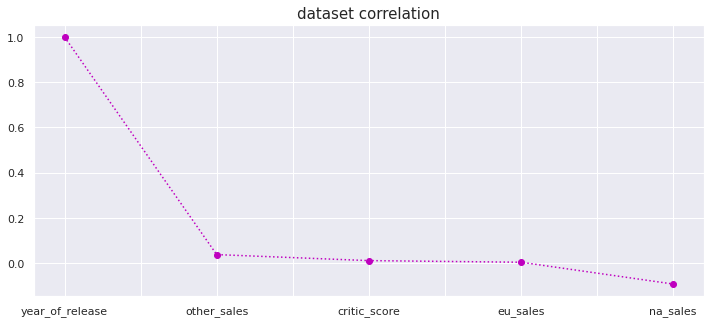

In [19]:
filt_overview(2)

Столбец содержит данные о дате выхода игры. Около 1.61% строк содержат пропуски, попробуем рассмотреть их отдельно:

In [20]:
filt_data[filt_data['year_of_release'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.00,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.00,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.00,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.00,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.00,tbd,E
677,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.00,6.6,E10+
718,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.00,6.7,T
804,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.00,6.3,T


269 строк содержат пропуски в столбце year_of_release, без какой-либо очевидной взаимосвязи друг с другом. Так как обьем пропущенных данных составляет менее 2%, а единственный очевидный вариант заполнения - это заполнить каждое значение вручную, то принято решение удалить строки с пропусками, заменить тип данных на int16 (как более соответствующий диапазону значений и занимающий меньший обьем памяти) и перейти к следующему столбцу:

In [21]:
filt_data = filt_data[filt_data['year_of_release'].notna()]
filt_data['year_of_release'] = filt_data['year_of_release'].astype('int16')
filt_overview(2)
filt_data['year_of_release'].dtype

count   16,443.00
mean     2,006.49
std          5.88
min      1,980.00
25%      2,003.00
50%      2,007.00
75%      2,010.00
max      2,016.00
Name: year_of_release, dtype: float64
data type - int16


dtype('int16')

In [22]:
filt_overview(3)
filt_data['genre'].value_counts()

count      16443
unique        12
top       Action
freq        3307
Name: genre, dtype: object
data type - object


Action          3307
Sports          2305
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

Столбец содержит данные о жанре игры в датасете. Столбец содержит 12 уникальных значений: самое распространенное значение - игры жанра "экшн" (`Action`, 3307 строк), наименее распространенное - игры жанра "пазл/головоломки" (`Puzzle`, 569 строк). Явных дубликатов не обнаружено, перейдем к следующему столбцу:

In [23]:
filt_overview(4)
filt_data['na_sales'].sort_values()

count   16,443.00
mean         0.26
std          0.82
min          0.00
25%          0.00
50%          0.08
75%          0.24
max         41.36
Name: na_sales, dtype: float64
data type - float64


16710    0.00
12495    0.00
12496    0.00
12500    0.00
12501    0.00
         ... 
2       15.68
5       23.20
9       26.93
1       29.08
0       41.36
Name: na_sales, Length: 16443, dtype: float64

В столбце содержатся данные о количестве проданных копий игр в регионе NA (Северная Америка). При ближайшем рассмотрении распределения данных становится ясно, что явных пропусков в столбце нет - но присутствует значительная доля строк с нулевыми значениями продаж в регионе NA - рассмотрим их ближе:

In [24]:
filt_data[filt_data['na_sales'] == 0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
215,Monster Hunter Freedom 3,PSP,2010,Role-Playing,0.00,0.00,4.87,0.00,NaN,NaN,NaN
340,Friend Collection,DS,2009,Misc,0.00,0.00,3.67,0.00,NaN,NaN,NaN
385,Monster Hunter 4,3DS,2013,Role-Playing,0.00,0.00,3.44,0.00,NaN,NaN,NaN
403,English Training: Have Fun Improving Your Skills!,DS,2006,Misc,0.00,0.99,2.32,0.02,NaN,NaN,NaN
428,Dragon Quest VI: Maboroshi no Daichi,SNES,1995,Role-Playing,0.00,0.00,3.19,0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16705,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN
16706,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16707,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16708,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN


Около трети строк не имеют данных по продажам в регионе NA - скорее всего данные игры не продавались в этом регионе и являются эксклюзивными играми для других регионов, как регионы EU и JP (Европа и Япония, соответственно). Можно отметить наличие игр, для которых не указаны продажи во всех регионах - оценим их количество:

In [25]:
filt_data.query('na_sales == 0 and eu_sales == 0 and jp_sales == 0 and other_sales == 0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16672,G1 Jockey 4 2008,PS3,2008,Sports,0.00,0.00,0.00,0.00,NaN,NaN,NaN
16705,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN


Две строки не содержат никакой информации по продажам - как и по оценкам пользователей/критиков. Удалим эти две строки и заменим тип данных на float16 для оптимизации потребления памяти - и перейдем к следующему столбцу:

In [26]:
filt_data = filt_data.drop(16672)
filt_data = filt_data.drop(16705)
filt_data.query('na_sales == 0 and eu_sales == 0 and jp_sales == 0 and other_sales == 0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [27]:
filt_data['na_sales'] = filt_data['na_sales'].astype('float16')
filt_data['na_sales'].dtype

dtype('float16')

In [28]:
filt_overview(5)

count   16,441.00
mean         0.15
std          0.51
min          0.00
25%          0.00
50%          0.02
75%          0.11
max         28.96
Name: eu_sales, dtype: float64
data type - float64


В столбце содержатся данные о количестве проданных копий игр в регионе EU (Европа). При ближайшем рассмотрении распределения данных становится ясно, что явных пропусков в столбце нет - но присутствует значительная доля строк с нулевыми значениями продаж в регионе EU - рассмотрим их ближе:

In [29]:
filt_data[filt_data['eu_sales'] == 0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
148,Final Fantasy XII,PS2,2006,Role-Playing,1.88,0.00,2.33,1.74,92.00,7.6,T
215,Monster Hunter Freedom 3,PSP,2010,Role-Playing,0.00,0.00,4.87,0.00,NaN,NaN,NaN
268,Metal Gear Solid 3: Snake Eater,PS2,2004,Action,1.46,0.00,0.83,1.93,91.00,9.3,M
284,Half-Life,PC,1997,Shooter,4.03,0.00,0.09,0.00,96.00,9.1,M
316,Dragon Warrior III,NES,1988,Role-Playing,0.10,0.00,3.77,0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16704,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN
16706,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16708,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Более трети строк не имеют данных по продажам в регионе EU - скорее всего данные игры не продавались в этом регионе и являются эксклюзивными играми для других регионов, как регионы NA и JP (Северная Америка и Япония, соответственно). Количество нулевых значений в столбце превышает показания столбца NA. Так как нулевые значения продаж не являются явными пропусками, а других пропусков не наблюдается - мы заменим тип данных на float16 для оптимизации потребления памяти и перейдем к следующему столбцу:

In [30]:
filt_data['eu_sales'] = filt_data['eu_sales'].astype('float16')
filt_data['eu_sales'].dtype

dtype('float16')

In [31]:
filt_overview(6)

count   16,441.00
mean         0.08
std          0.31
min          0.00
25%          0.00
50%          0.00
75%          0.04
max         10.22
Name: jp_sales, dtype: float64
data type - float64


В столбце содержатся данные о количестве проданных копий игр в регионе JP (Япония). При ближайшем рассмотрении распределения данных становится ясно, что явных пропусков в столбце нет - но присутствует значительная доля строк с нулевыми значениями продаж в регионе JP - рассмотрим их ближе:

In [32]:
filt_data[filt_data['jp_sales'] == 0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
61,Just Dance 3,Wii,2011,Misc,5.95,3.11,0.00,1.06,74.00,7.8,E10+
85,The Sims 3,PC,2009,Simulation,0.99,6.42,0.00,0.60,86.00,7.6,T
89,Pac-Man,2600,1982,Puzzle,7.28,0.45,0.00,0.08,NaN,NaN,NaN
100,Call of Duty: World at War,X360,2008,Shooter,4.81,1.88,0.00,0.69,84.00,7.6,M
103,Just Dance,Wii,2009,Misc,3.48,2.99,0.00,0.73,49.00,8,E10+
...,...,...,...,...,...,...,...,...,...,...,...
16701,15 Days,PC,2009,Adventure,0.00,0.01,0.00,0.00,63.00,5.8,NaN
16702,Men in Black II: Alien Escape,GC,2003,Shooter,0.01,0.00,0.00,0.00,NaN,tbd,T
16704,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN
16707,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN


Две трети строк не имеют данных по продажам в регионе JP - скорее всего данные игры не продавались в этом регионе и являются эксклюзивными играми для других регионов, как регионы NA и EU (Северная Америка и Европа, соответственно). Количество нулевых значений в столбце приблизительно равно сумме показаний столбца NA и EU. Так как нулевые значения продаж не являются явными пропусками, а других пропусков не наблюдается - заменим тип данных столбца на float16 для оптимизации потребления памяти и  перейдем к следующему столбцу:

In [33]:
filt_data['jp_sales'] = filt_data['jp_sales'].astype('float16')
filt_data['jp_sales'].dtype

dtype('float16')

In [34]:
filt_overview(7)

count   16,441.00
mean         0.05
std          0.19
min          0.00
25%          0.00
50%          0.01
75%          0.03
max         10.57
Name: other_sales, dtype: float64
data type - float64


В столбце содержатся данные о количестве проданных копий игр в регионах по всему миру, кроме NA, EU и JP (Северная Америка, Европа и Япония, соответственно). При ближайшем рассмотрении распределения данных становится ясно, что явных пропусков в столбце нет - но присутствует значительная доля строк с нулевыми значениями продаж - рассмотрим их ближе:

In [35]:
filt_data[filt_data['other_sales'] == 0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
138,World of Warcraft,PC,2004,Role-Playing,0.08,6.21,0.00,0.00,93.00,7.3,T
215,Monster Hunter Freedom 3,PSP,2010,Role-Playing,0.00,0.00,4.87,0.00,NaN,NaN,NaN
284,Half-Life,PC,1997,Shooter,4.03,0.00,0.09,0.00,96.00,9.1,M
288,World of Warcraft: The Burning Crusade,PC,2007,Role-Playing,2.57,1.52,0.00,0.00,91.00,7.9,T
316,Dragon Warrior III,NES,1988,Role-Playing,0.10,0.00,3.77,0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16706,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16707,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16708,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Около трети строк не имеют данных по продажам - скорее всего данные игры не продавались по всему миру и являются эксклюзивными играми для трех упомянутых регионов: NA, EU и JP (Северная Америка, Европа и Япония, соответственно). Количество нулевых значений в столбце больше, чем в `na_sales` и `eu_sales`, но меньше чем в `jp_sales`. 


Так как нулевые значения продаж не являются явными пропусками, а других пропусков не наблюдается - заменим тип данных на float16 для оптимизации потребления памяти и перейдем к следующему столбцу:

In [36]:
filt_data['other_sales'] = filt_data['other_sales'].astype('float16')
filt_data['other_sales'].dtype

dtype('float16')

count   7,982.00
mean       68.99
std        13.92
min        13.00
25%        60.00
50%        71.00
75%        79.00
max        98.00
Name: critic_score, dtype: float64
data type - float64

cells with missing data = 8459
missing data share = 51.45%


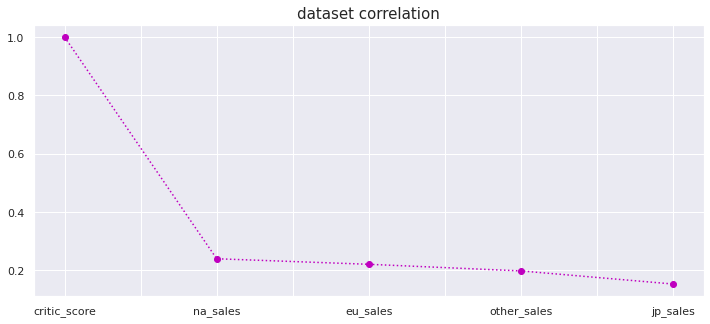

In [37]:
filt_overview(8)

В столбце содержатся данные об оценке игры професcиональными критиками по 100-бальной шкале. От оценок критиков можно было бы ожидать корреляции с оценками пользователей (на данный момент не расчитывается из-за некорректного типа данных столбца `user_score`), которую можно было бы использовать для заполнения пропущенных данных медиаными значениями. Этот метод подходит для ситуации с технической природой отсутствия пропусков (ошибки выгрузки, например), но здесь скорее всего пропуски оправданы - игры могли оцениваться только для конкретных платформ, или же не оцениваться вовсе в связи маленьким тиражом или выпуском только на локальном рынке. Поэтому значения останутся как есть. 

Заменим тип данных на float16 как более соответствующий данным в столбце - и переходим дальше:

In [38]:
filt_data['critic_score'] = filt_data['critic_score'].astype('float16')
filt_data['critic_score'].dtype

dtype('float16')

In [39]:
filt_overview(9)
filt_data['user_score'].unique()

count     9838
unique      96
top        tbd
freq      2376
Name: user_score, dtype: object
data type - object

cells with missing data = 6603
missing data share = 40.16%


array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [40]:
filt_data[filt_data['user_score'] == 'tbd'].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.00,0.54,61.00,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.00,0.20,71.00,tbd,E
717,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E


Самое распространенное значение в столбце - `tbd`, что скорее всего означает "To be determined" ("Подлежит определению", перевод с англ.). Предположительно, именно это значение и является причиной указания типа данных столбца как `object`. Так как в рамках данной работы значение `tbd` в столбце равнозначно пропуску, мы заменим это значение на пропуски, заменим тип данных на float16 как более соответствующий имеющимся данным и проанализируем столбец снова:

count   7,462.00
mean        7.12
std         1.50
min         0.00
25%         6.40
50%         7.50
75%         8.20
max         9.70
Name: user_score, dtype: float64
data type - float16

cells with missing data = 8979
missing data share = 54.61%


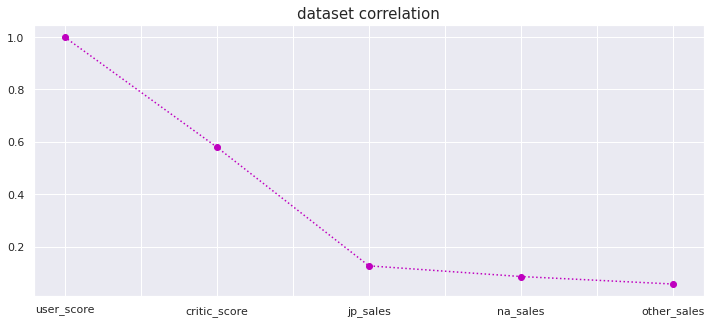

In [41]:
filt_data['user_score'] = (
    filt_data['user_score']
    .replace('tbd', np.NaN)
)

filt_data['user_score'] = filt_data['user_score'].astype('float16')
filt_data['user_score'].dtype

filt_overview(9)

Как и предполагалось ранее, коэффициент корреляции между `user_score` и `critic_score` составляет `0.6` - что соответствует среднему уровню взаимосвязи данных. Но заполнение пропусков тут также нецелесообразно, так как причины их возникновения явно идентичны ситуции с оценками критиков. Оставим пропуски как есть и перейдём к последнему столбцу:

In [42]:
filt_overview(10)
display(pd.pivot_table(filt_data,
               index=['rating'],
               values=['name'],
               aggfunc={'name':'count'}
              ).sort_values(by='name').T
       )
display(filt_data.query('na_sales == 0').head(5))
filt_data.query('na_sales > 0 and rating.isna()')

count     9767
unique       8
top          E
freq      3920
Name: rating, dtype: object
data type - object

cells with missing data = 6674
missing data share = 40.59%


rating,AO,RP,K-A,EC,E10+,M,T,E
name,1,1,3,8,1393,1536,2905,3920


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
215,Monster Hunter Freedom 3,PSP,2010,Role-Playing,0.00,0.00,4.87,0.00,NaN,NaN,NaN
340,Friend Collection,DS,2009,Misc,0.00,0.00,3.67,0.00,NaN,NaN,NaN
385,Monster Hunter 4,3DS,2013,Role-Playing,0.00,0.00,3.44,0.00,NaN,NaN,NaN
403,English Training: Have Fun Improving Your Skills!,DS,2006,Misc,0.00,0.99,2.32,0.02,NaN,NaN,NaN
428,Dragon Quest VI: Maboroshi no Daichi,SNES,1995,Role-Playing,0.00,0.00,3.19,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.94,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16671,Original Frisbee Disc Sports: Ultimate & Golf,DS,2007,Action,0.01,0.00,0.00,0.00,NaN,NaN,NaN
16689,PGA European Tour,N64,2000,Sports,0.01,0.00,0.00,0.00,NaN,NaN,NaN
16690,Carmageddon 64,N64,1999,Action,0.01,0.00,0.00,0.00,NaN,NaN,NaN
16704,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В столбце содержатся данные о рейтинге игры от организации [ESRB](https://www.esrb.org/), которая расположена и действует на территории Северной Америки: для игр, которые не выпускались в этом регионе, рейтинга нет - при этом для 2988 игр, у которых есть данные о продажах в регионе Северной Америке, отсутствуют данные о рейтинге. Скорее всего это вызвано технической ошибкой, так как данные о рейтингах этих игр можно найти в открытом доступе - например, [Super Mario Bros.](https://www.esrb.org/ratings/9945/super-mario-bros/)(рейтинг - `E`) или [Carmageddon 64](https://www.esrb.org/ratings/4484/carmageddon-n64/) (рейтинг - `M`).

Согласно [руководству по рейтингам с официального сайта ESRB](https://www.esrb.org/ratings-guide/):

`E` - Everyone (для всех возрастов)

`T` - Teen (13+)

`M` - Mature (17+)

`E10+` - Everyone 10+ (10+)

`EC` - Early Childhood (больше не используется, заменён на E)

`K-A` - Kids-Adults (больше не используется, заменён на E)

`AO` - Adults Only (18+)

`RP` - Raiting Pending (рейтинг не присвоен, используется для рекламы, до выпуска игры в продажу рейтинг обязательно меняется).


Таким образом, в таблице встречаются игры с устаревшими рейтингами (`EC` и `K-A`), что вероятнее всего обусловлено их годом выпуска. В рамках проекта эти рейтинги можно заменить на актуальные для более точной картины исследования.

Посмотрим на единственную игру с рейтингом RP:

In [43]:
filt_data[filt_data['rating'] == 'RP']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14267,Supreme Ruler: Cold War,PC,2011,Strategy,0.00,0.03,0.00,0.01,63.00,6.80,RP


Согласно [странице игры на ESRB](https://www.esrb.org/ratings/31253/supreme-ruler-cold-war/), официальный рейтинг после релиза - `E`.

Посмотрим на единственную игру с рейтингом AO:

In [44]:
filt_data[filt_data['rating'] == 'AO']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
874,Grand Theft Auto: San Andreas,XB,2005,Action,1.26,0.61,0.00,0.09,93.00,8.60,AO


Согласно [странице игры на ESRB](https://www.esrb.org/ratings/20427/grand-theft-auto-san-andreas/), официальный рейтинг - `M`.

Как уже упоминалось ранее, для 2988 строк датасета с продажами в регионе Северной Америки (где базируется рейтинговая система ESRB) рейтинги не указаны - и скорее всего для большинства игр, которые были выпущены в продажу в Северной Америке, их можно найти и указать. Но так как единственный очевидный способ это сделать - это искать и записать рейтинг к каждой игре вручную, мы этого делать, конечно же, не будем и заполним пропуски значением `No rating`.

Обновим рейтинги датасета и сновы выведем список уникальных значений столбца:

In [45]:
filt_data['rating'] = (
    filt_data['rating']
    .replace({'EC':'E', 
              'K-A':'E', 
              'RP':'E', 
              'AO':'M'})
)

filt_data['rating'] = (
        filt_data['rating']
    .fillna('No rating')
)   
    
display(pd.pivot_table(filt_data,
               index=['rating'],
               values=['name'],
               aggfunc={'name':'count'}
              ).sort_values(by='name').T
       )

rating,E10+,M,T,E,No rating
name,1393,1537,2905,3932,6674


Мы завершили обзор столбцов датасета - теперь мы добавим столбец общих продаж и снова взглянем на датасет:

In [46]:
filt_data['total_sales'] = (
    filt_data[['na_sales',
          'eu_sales',
          'jp_sales', 
          'other_sales']]
    .sum(axis=1)
)

filt_data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.38,28.95,3.77,8.45,76.00,8.00,E,82.50
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,No rating,40.25
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.50
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.75
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,No rating,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,No rating,30.27
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.00,8.50,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.00,6.60,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.00,8.40,E,28.31
9,Duck Hunt,NES,1984,Shooter,26.94,0.63,0.28,0.47,NaN,NaN,No rating,28.31


In [47]:
raw_data.info()
raw_data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [48]:
filt_data.info()
filt_data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16441 entries, 0 to 16710
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16441 non-null  object 
 1   platform         16441 non-null  object 
 2   year_of_release  16441 non-null  int16  
 3   genre            16441 non-null  object 
 4   na_sales         16441 non-null  float16
 5   eu_sales         16441 non-null  float16
 6   jp_sales         16441 non-null  float16
 7   other_sales      16441 non-null  float16
 8   critic_score     7982 non-null   float16
 9   user_score       7462 non-null   float16
 10  rating           16441 non-null  object 
 11  total_sales      16441 non-null  float16
dtypes: float16(7), int16(1), object(4)
memory usage: 899.1+ KB


name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8459
user_score         8979
rating                0
total_sales           0
dtype: int64

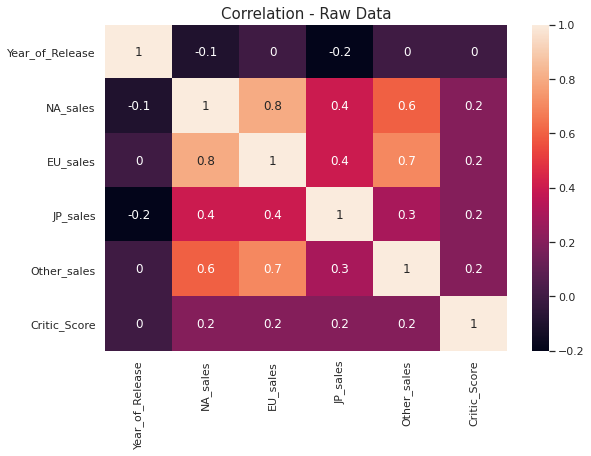

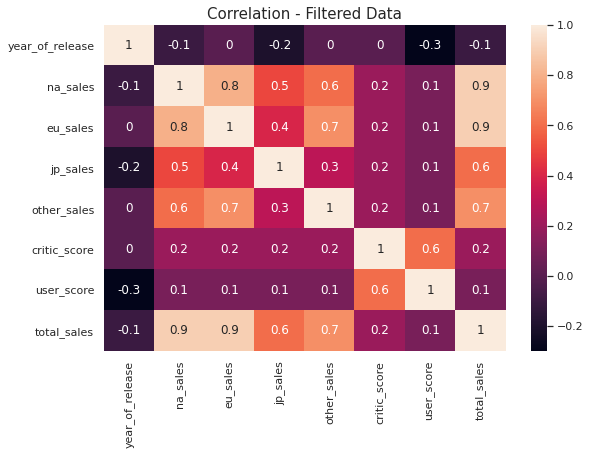

In [49]:
plt.figure(figsize=(9,6))
sns.heatmap(round(raw_data.corr(), 1), annot=True)
plt.title('Correlation - Raw Data')
plt.show()

plt.figure(figsize=(9,6))
sns.heatmap(round(filt_data.corr(), 1), annot=True)
plt.title('Correlation - Filtered Data')
plt.show()

In [50]:
na_diff = round((raw_data.isna().sum().sum()-filt_data.isna().sum().sum())/raw_data.isna().sum().sum()*100, 2)
size_diff = round((len(raw_data)-len(filt_data))/len(raw_data)*100, 2) # разница в количестве строк
memory_diff = round((1.4-0.9)/2*100, 2)


print(f'В ходе предобработки данных было обработано {na_diff}% пропущенных значений. \
Было удалено {size_diff}% датасета, при этом удалось \n сократить использование памяти на {memory_diff}%.')

В ходе предобработки данных было обработано 21.87% пропущенных значений. Было удалено 1.64% датасета, при этом удалось 
 сократить использование памяти на 25.0%.


### Выводы и наблюдения: Предобработка данных

---

- В ходе предобработки данных было обработано 21.87% пропущенных значений. Было удалено 1.64% датасета, при этом удалось сократить использование памяти на 25.0%.


- Данные содержат информацию об играх, выпущенных с 1980 по 2016 годы.


- Предположительно, дубликаты в столбце `name` являются версиями одной игры на разных платформах: одна игра может быть выпущена на нескольких платформах одновременно, а распространенность игры Need for Speed: Most Wanted можно обьяснить наличием одновременно оригинальной игры 2005 года и перевыпуска той же игры для нового поколения игровых платформ в 2012 году. В примере данной игры мы изменили название, чтобы не путаться в версиях. В целом, для мультиплатформеных игр отдельно считаются продажи, пользовательский рейтинг и оценки критиков (иногда - даже рейтинг ESRB) для каждой платформы, что делает объединение информации об о таких играх нецелесообразным. 


-  В столбце `platform` присутствуют 31 уникальная игровая платформа, явных дубликатов среди них нет. 


- Столбец `genre` содержит 12 уникальных значений: самое распространенное значение - игры жанра "экшн" (`Action`, 3307 строк), наименее распространенное - игры жанра "пазл/головоломки" (`Puzzle`, 569 строк). Явных дубликатов не обнаружено.


- В изначальном датасете присутствуют четыре столбца с данными о количестве продаж игр по регионам: `na_sales` - количество проданных игр (в млн. ед.) в Северной Америке, `eu_sales` - количество проданных игр (в млн. ед.) в Европейском регионе (без указания, имеется ли ввиду Европа целиком, как часть Евразийского континента, или же только страны Европейского Союза), `jp_sales` - количество проданных игр (в млн. ед.) в Японии, `other_sales` - количество проданных игр (в млн. ед) в регионах, кроме Северной Америки, Европы и Японии (так же без указания, имеются ли ввиду другие определенные регионы или же весь оставшийся мир).


- Наличие вышеуказанных столбцов и как они распределены в датасете наводит на мысль об экономической важности регионов Северной Америки, Европы и Японии отдельно, равно как и их влияние на рынок видеоигр. Нулевые значения в данных о продажах в разрезе регионов могут означать, что игра не выпускалась на рынок конкретного региона, или же просто плохо продавалась.


- В столбце `critic_score` содержатся данные об оценке игры професcиональными критиками по 100-бальной шкале. Коэффициент корреляции между `user_score` и `critic_score` составляет `0.6` - что соответствует среднему уровню взаимосвязи данных, которую можно было бы использовать для заполнения пропущенных данных медиаными значениями. Этот метод подходит для ситуации с технической природой отсутствия пропусков (ошибки выгрузки, например), но здесь скорее всего пропуски оправданы - игры могли оцениваться только для конкретных платформ, или же не оцениваться вовсе в связи маленьким тиражом или выпуском только на локальном рынке. Поэтому значения останутся как есть.


- Самое распространенное значение в столбце `user_score` - `tbd`, что скорее всего означает "To be determined" ("Подлежит определению", перевод с англ.). Предположительно, именно это значение и является причиной указания типа данных столбца как `object`. Так как в рамках данной работы значение `tbd` в столбце равнозначно пропуску, мы заменим это значение на пропуски. Как упоминалось ранее, коэффициент корреляции между `user_score` и `critic_score` составляет `0.6` - что соответствует среднему уровню взаимосвязи данных. Но заполнение пропусков тут также нецелесообразно, так как причины их возникновения явно идентичны ситуации с оценками критиков.


- В столбце `rating` содержатся данные о рейтинге игры от организации ESRB, которая расположена и действует на территории Северной Америки: для игр, которые не выпускались в этом регионе, рейтинга нет - при этом для 2988 игр, у которых есть данные о продажах в регионе Северной Америке, отсутствуют данные о рейтинге. Скорее всего это вызвано технической ошибкой, так как данные о рейтингах этих игр можно найти в открытом доступе - например, Super Mario Bros.(рейтинг - `E`) или Carmageddon 64 (рейтинг - `M`). Скорее всего для большинства игр, которые были выпущены в продажу в Северной Америке, рейтинг можно найти и указать. Но так как единственный очевидный способ это сделать - это искать и записать рейтинг к каждой игре вручную - мы этого делать, конечно же, не будем и заполним пропуски значением `No rating`. Также в таблице встречаются игры с устаревшими рейтингами (`EC` и `K-A`), что вероятнее всего обусловлено их годом выпуска, а также неактульные для конкретных игр (`AO` и `RP`). В рамках проекта эти рейтинги были заменены на актуальные для более точной картины исследования.

---

<a id='3'></a>
## Исследовательский анализ данных

[*Вернуться к оглавлению*](#0)

### Определение актуального периода для исследования

Первым этапом исследовательского анализа будет общая оценка количества игр за каждый год в наблюдаемом промежутке датасета:

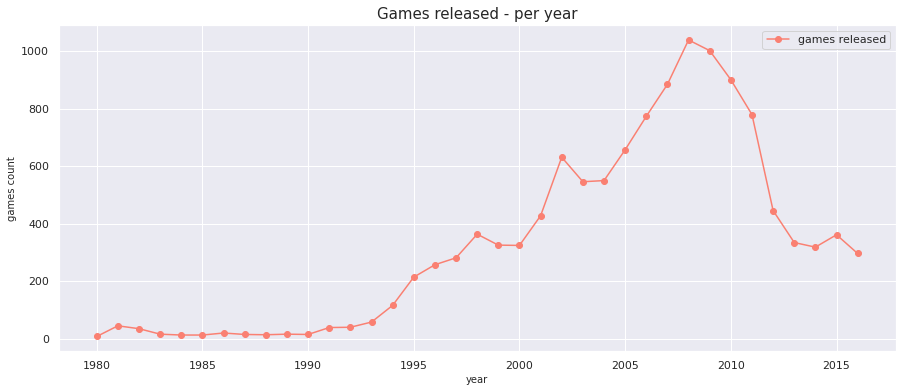

In [51]:
# создадим копию filt_data для исследовательского анализа
eda = filt_data.copy()

(
    eda
    .pivot_table(
     index='year_of_release', 
     values='name', 
     aggfunc='nunique')
 .rename(
     columns={'name':'games released'})
 .plot(
     style='o-', 
     figsize=[15,6], 
     ylabel='games count', 
     xlabel='year', 
     title='Games released - per year')
)
plt.grid(visible=True)
plt.show()

На графике заметен стабильный рост, начиная с 1990-го года, и достигая пикового значения в 2008 году, а затем идет резкий спад. Исторически лучший период - с 2005-го по 2010-ый. Для дальнейшего исследования установим 1990-ый год как нижний порог, так как до этой точки данные не показывают какой-либо заметной динамики, пригодной для исследования.

Далее мы изучим объёмы общих продаж по всем регионам в разрезе игровых платформ - определим рейтинг платформ по количеству продаж и рассмотрим динамику по годам:

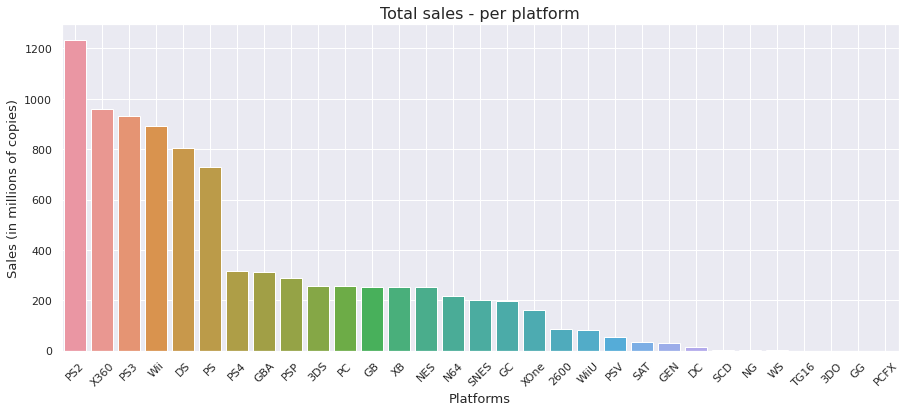

In [52]:
platform_sales = (
    eda
    .pivot_table(
        index='platform', 
        values='total_sales', 
        aggfunc='sum')
    .sort_values('total_sales', ascending=False)
)


plt.figure(figsize=(15,6))

sns.barplot(
    x = platform_sales.index, 
    y = platform_sales['total_sales']
)

plt.title('Total sales - per platform', fontsize=16)
plt.xlabel('Platforms', fontsize=13)
plt.xticks(rotation=45)
plt.ylabel('Sales (in millions of copies)', fontsize=13)
plt.grid(visible=True)
plt.show()

Первые шесть платформ лидируют - более чем с двухкратным отрывом. Можно обратить внимание на заметный разброс в датах выпуска консолей: шестая позиция в списке, `PS` или "PlayStation", является консолью [пятого поколения](https://ru.wikipedia.org/wiki/%D0%9F%D1%8F%D1%82%D0%BE%D0%B5_%D0%BF%D0%BE%D0%BA%D0%BE%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B8%D0%B3%D1%80%D0%BE%D0%B2%D1%8B%D1%85_%D1%81%D0%B8%D1%81%D1%82%D0%B5%D0%BC) - и была выпущена в 1994 году (указана дата выпуска в Японии: в Северной Америке и Европе консоль была выпущена в 1995 году); первая позиция в списке, `PS2` или "PlayStation 2", является консолью [шестого поколения](https://ru.wikipedia.org/wiki/%D0%A8%D0%B5%D1%81%D1%82%D0%BE%D0%B5_%D0%BF%D0%BE%D0%BA%D0%BE%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B8%D0%B3%D1%80%D0%BE%D0%B2%D1%8B%D1%85_%D1%81%D0%B8%D1%81%D1%82%D0%B5%D0%BC) - и была выпущена в 2000 году для всех регионов; остальные же платформы - `X360` (Xbox 360), `PS3` (PlayStation 3), `Wii` (Nintendo Wii) и `DS` (Nintendo DS) были выпущены в период с 2005 по 2006 год, в рамках [седьмого поколения](https://ru.wikipedia.org/wiki/%D0%A1%D0%B5%D0%B4%D1%8C%D0%BC%D0%BE%D0%B5_%D0%BF%D0%BE%D0%BA%D0%BE%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B8%D0%B3%D1%80%D0%BE%D0%B2%D1%8B%D1%85_%D1%81%D0%B8%D1%81%D1%82%D0%B5%D0%BC) консолей. 

Если появление новых консолей происходит примерно раз в 5-7 лет, то уход с рынка старых консолей менее однозначен: консоли могут оставаться - и зачастую остаются - жизнеспособными более 5 лет; производство физических консолей и разработка игр для них могут продолжаться на протяжении всего срока или даже превышать его; так же возможный теоретический расчет со стороны компаний-производителей на покупку пользователями новой консоли и избавление от старой ради избежания "морального устаревания" не выглядит правдоподобным - более вероятно, что с течением времени новые консоли заменяют старые плавным образом, на протяжении всего заложенного срока жизни консолей и/или срока их производства. 

Исходя из таких рассуждений, наиболее вероятным кажется следующий вариант: новые консоли появляются на рынке с периодичностью в 5-7 лет, тогда как старые консоли и игры к ним выходят из массового обращения с периодичностью примерно в 10 лет.

Попробуем подтвердить или опровергнуть данные наблюдения, рассмотрев шесть лидирующих по продажам консолей отдельно:

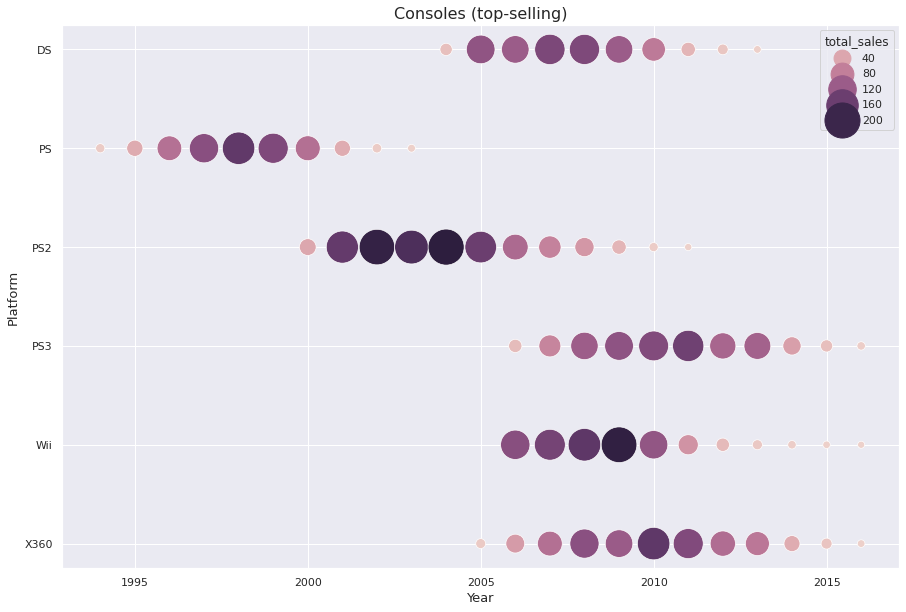

In [53]:
top_selling_platforms = (
    
    eda[eda['platform']
         .isin(platform_sales
               .reset_index()
               .query('total_sales > 350')['platform']
               .to_list()
              )]
    .reset_index(drop=True)
    .pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
    .reset_index()
)

plt.figure(figsize=[15,10])

sns.scatterplot(data=top_selling_platforms
                .query('year_of_release > 1990'),
                x='year_of_release', 
                y='platform', 
                hue='total_sales', 
                size='total_sales',
                sizes=(50,1300),
               )

plt.title('Consoles (top-selling)', fontsize=16)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Platform', fontsize=13)
plt.grid(visible=True)
plt.show()

---

Исходя из вышеуказанных наблюдений и данного графика, можно сделать следующие выводы:

- Новые консоли выходят с периодичностью в 5-6 лет, а находятся на рынке видеоигр в среднем около 10 лет.


- Самые низкие значения продаж игр для консолей приходятся в начале и конце жизни консоли - первый год и последние два.


- Самые высокие значения продаж игр для консолей приходятся на отметку в 3-5 лет на рынке, далее идет спад.


- К 2015 году только три из шести лидирующих консолей продолжают заметно участвовать на игровом рынке - при этом все три уже подходят к концу своих жизненных циклов. 

### Определение потенциально выгодных платформ

Среди платформ, не попавших на лидирующие позиции, встречаются консоли [восьмого поколения](https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D0%BA%D0%BE%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F_%D0%B4%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B8%D1%85_%D0%B8%D0%B3%D1%80%D0%BE%D0%B2%D1%8B%D1%85_%D1%81%D0%B8%D1%81%D1%82%D0%B5%D0%BC#%D0%92%D0%BE%D1%81%D1%8C%D0%BC%D0%BE%D0%B5_%D0%BF%D0%BE%D0%BA%D0%BE%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_(2012_%E2%80%94_%D0%BD%D0%B0%D1%81%D1%82%D0%BE%D1%8F%D1%89%D0%B5%D0%B5_%D0%B2%D1%80%D0%B5%D0%BC%D1%8F)), вышедшие в 2013 году - "PlayStation 4", "Xbox One", "Nintendo Switch", "Nintendo Wii U" и другие. Согласно наблюдениям из предыдущего пункта, данные платформы имеют высокую вероятность продемострировать аналогичный цикл жизни: первый год сравнительно невысоких продаж, рост до пикового значения в пять лет и дальнейший спад. 

Так как новый цикл платформ начался в 2013 год, мы возьмем его за отправную точку актуального периода и оценим показатели платформ нового поколения:

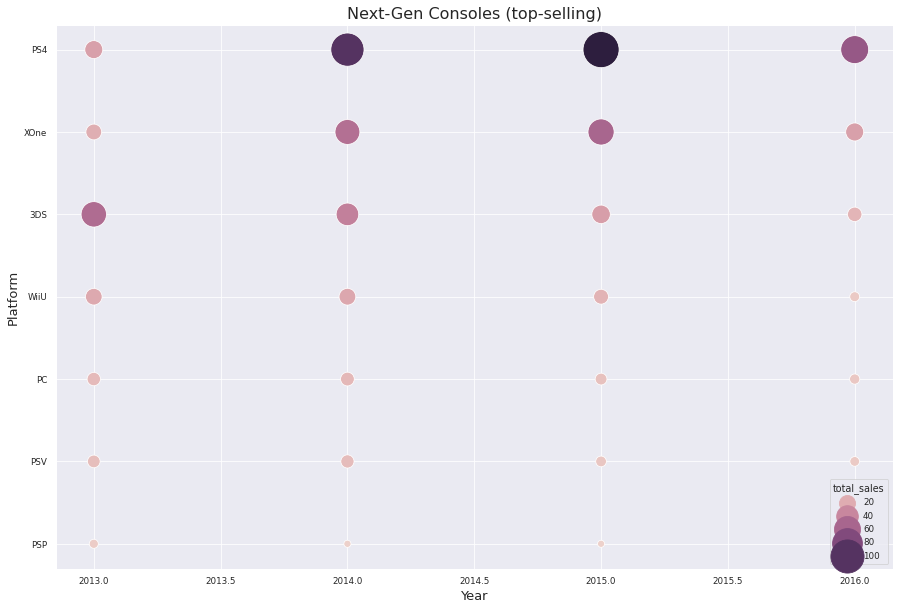

In [71]:
eda = eda[eda['year_of_release'] > 2012]

potential_platforms = (
    eda[~eda['platform']
         .isin(top_selling_platforms['platform']
               .unique().tolist())]
    .pivot_table(index=['platform', 'year_of_release'],
                 values='total_sales', aggfunc='sum')
    .sort_values(['total_sales'], ascending=False)
    .reset_index()
)

plt.figure(figsize=[15,10])

sns.scatterplot(data=potential_platforms
                .query('year_of_release > 2011'),
                x='year_of_release', 
                y='platform', 
                hue='total_sales', 
                size='total_sales',
                sizes=(50,1300),
               )

plt.title('Next-Gen Consoles (top-selling)', fontsize=16)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Platform', fontsize=13)
plt.grid(visible=True)
plt.show()

К 2016-му году актуальными остаются всего 6 платформ:

- PS4

- Nintendo 3DS

- Xbox One

- PC

- Nintendo Wii U

- PS Vita

Даже несмотря на то, что данные за 2016 могут быть неполными, актуальность этих платформ подтверждается не только объёмами продаж, но и динамикой роста/падения, а также этапом жизненного цикла.

 - Первые три платформы являются самыми новыми в выборке и явно лидируют по глобальным продажам в последние годы, что делает их потенциально прибыльными в будущем.

 - Последние две также достаточно новые, но не достигают больших объёмов глобальных продаж или впечатляющих темпов роста - возможно, что картина в разрезе локальных рынков будет отличаться.

 - У компьютера в качестве игровой платформы (PC) очень интересная динамика - она радикально не меняется на протяжении нескольких лет, при этом являясь одной из старейших игровых платформ в целом. 
 
Рассмотрим данные новых платформ подробнее:

In [84]:
eda[eda['platform'] == '3DS'].max()

name               Zyuden Sentai Kyoryuger: Game de Gaburincho!!
platform                                                     3DS
year_of_release                                             2016
genre                                                   Strategy
na_sales                                                    5.28
eu_sales                                                    4.19
jp_sales                                                    4.35
other_sales                                                 0.78
critic_score                                               91.00
user_score                                                  9.00
rating                                                         T
total_sales                                                14.60
dtype: object

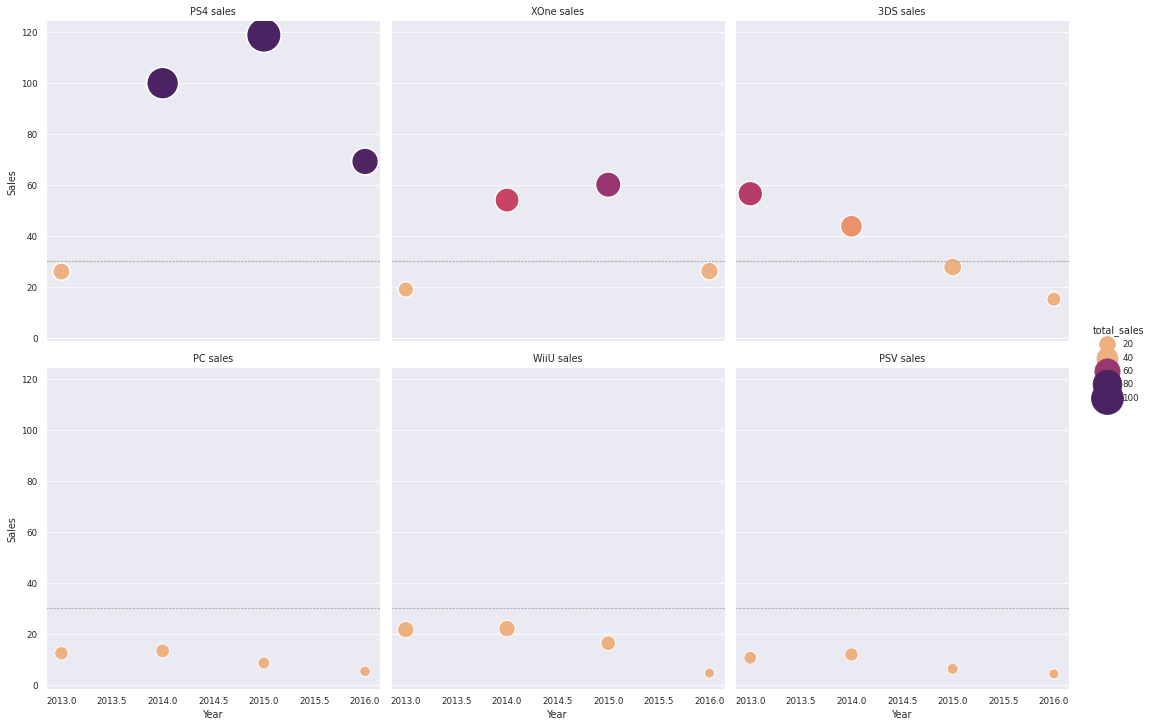

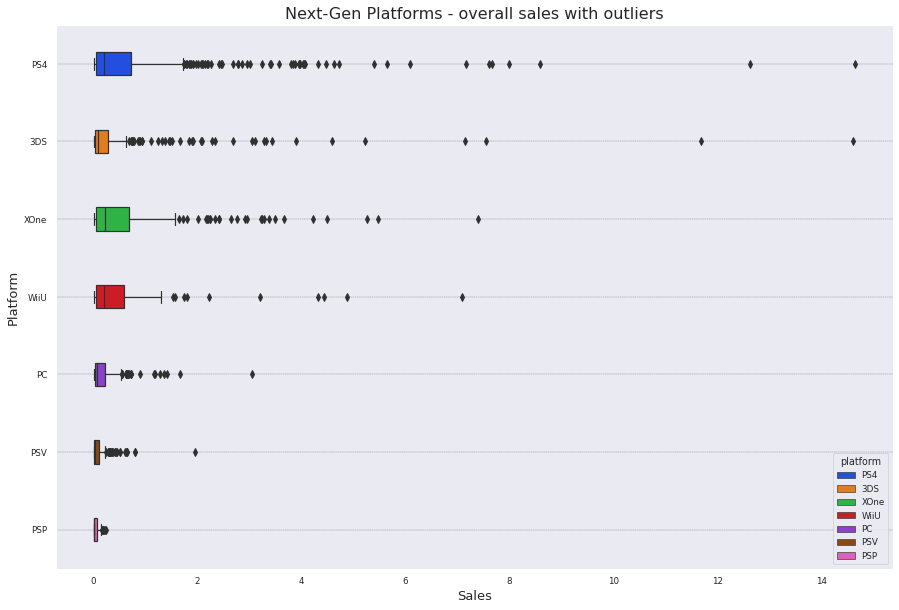

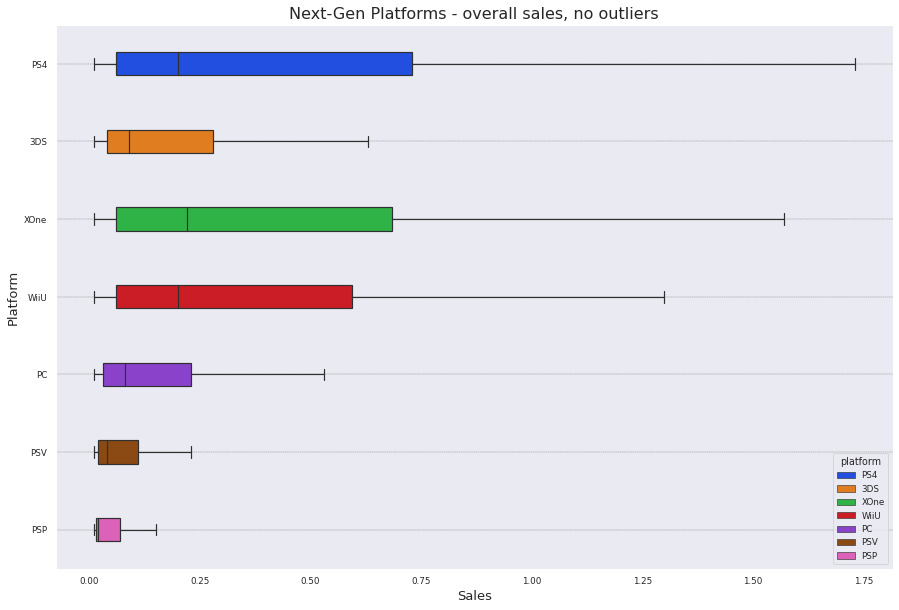

In [76]:
# фильтруем данные, оставляя только актуальные платформы

potential_list = ['PS4', 'XOne', '3DS', 'PC', 'WiiU', 'PSV']

potential_df = (
    potential_platforms[potential_platforms['platform']
                 .isin(potential_list)]
)

# визуализируем динамику продаж

g = (
    sns.relplot(
    data=potential_df,
    x='year_of_release', 
    col='platform', 
    col_wrap=3,
    palette='flare',
    y='total_sales',
    hue='total_sales',
    hue_norm=(40, 70),
    size='total_sales',
    sizes=(100,1200),
    height=5,
    aspect=1,
    col_order=potential_list)
    )

g.map(plt.grid, color='.7', axis='x')

(g.map(plt.axhline, y=30, color=".7", dashes=(2, 1))
 .set_axis_labels("Year", "Sales")
 .set_titles("{col_name} sales")
)
plt.show()

# смотрим на общий объем продаж с выбросами

plt.figure(figsize=[15,10])
(
    sns.boxplot(
        data=eda[~eda['platform']
                 .isin(top_selling_platforms['platform']
                       .unique().tolist())]
        .reset_index(),
        x='total_sales', 
        y='platform', 
        hue='platform', 
        dodge=False, width=.3, showfliers=True)
)

plt.title('Next-Gen Platforms - overall sales with outliers', fontsize=16)
plt.ylabel('Platform', fontsize=13)
plt.xlabel('Sales', fontsize=13)
plt.grid(color='k', linestyle='-.', linewidth = 0.2)
plt.show()

# смотрим на общий объем продаж без выбросов

plt.figure(figsize=[15,10])
(
    sns.boxplot(
        data=eda[~eda['platform']
                 .isin(top_selling_platforms['platform']
                       .unique().tolist())]
        .reset_index(),
        x='total_sales', 
        y='platform', 
        hue='platform', 
        dodge=False, width=.3, showfliers=False)
)

plt.title('Next-Gen Platforms - overall sales, no outliers', fontsize=16)
plt.ylabel('Platform', fontsize=13)
plt.xlabel('Sales', fontsize=13)
plt.grid(color='k', linestyle='-.', linewidth = 0.2)
plt.show()

На основе данных из графиков, мы можем вывести следующие наблюдения по потенциально прибыльным платформам в рамках актуального периода:

- Все платформы без исключения показывают положительное смещение и непропорциональный перекос третьего квартиля и межквартального размаха - что свидетельствует о сравнительно низких медианных значениях продаж вне зависимости от платформы (менее 0.25 млн. руб или 250,000 руб)

- `PS4` занимает первое место по среднему числу продаж, размахам значений и количеству успешных игр-хитов - но медианное значение меньше `Xbox One` и такое же, как у `Wii U`.

- `3DS` уступает `PS4`, `Xbox One` и `Wii U` по показаниям медианы, размахам квартилей, едва обгоняет `PC` по квартильным показателям и не показывает положительную динамику роста продаж по актуальному периоду - но количество аномально успешных игр-хитов (схожее по количеству и распределению с показателями `PS4`) искажает данные, приводя среднее значение продаж консоли на второе место в списке, обгоняя `Xbox One` и `Wii U`.

- Положение `PC` как потенциально прибыльной игровой платформы может казаться спорным: находясь на пятом месте, платформа уступает по медианным, средним и абсолютным показателям `3DS`, `PS4`, `Xbox One` и `Wii U`, превосходя только `PSV` и `PSP`. Однако стоит иметь ввиду, что данная платформа выходит за типичные рамки поведения других - `PC` является собирательным названием разных поколений станционарных и мобильных компьютеров, которые адаптируются и видоизменяются с ходом технологического прогресса, противопоставляя универсальность и распространенность узконаправленной специализации других игровых платформ еще с 1990-х годов. Скорее всего `PC` не сможет в ближайшем будущем обойти по количеству продаж специализированные консоли, вроде современных версий `PlayStation` и `Xbox` - однако стабильный обьем продаж, проявленный в историческом разрезе, показывает данную платформу не самым выигрышным, но самым беспроигрышным вариантом для рассмотрения.

---

 - Согласно наблюдениям выше, самой потенциально прибыльной платформой на актуальный период является **`PS4`**; далее следуют `Xbox One` и `Wii U`, демострируя хорошие средние и квартильные показатели. Платформа `3DS` показывает хорошее среднее количество продаж, но показатели диаграммы размаха и динамика продаж за актуальный период характеризуют инвестиции в маркетинг игр данной платформы как сравнительно рискованное действие. Обратная `3DS` ситуация происходит с `PC` - данная платформа показывает наименьшие показатели из пяти платформ, однако долгожительность платформы и стабильность продаж характеризует платформу как более безопасную долгосрочную инвестицию.

### Влияние оценок пользователей и критиков на уровень продаж

Рассмотрим влияние оценок пользователей и критиков на уровень продаж и есть ли между тремя факторами взаимосвязь. Так как большее количество игр для плаформы означает более точные данные, для начала мы визуализируем количество игр для каждой платформы из актуального периода:

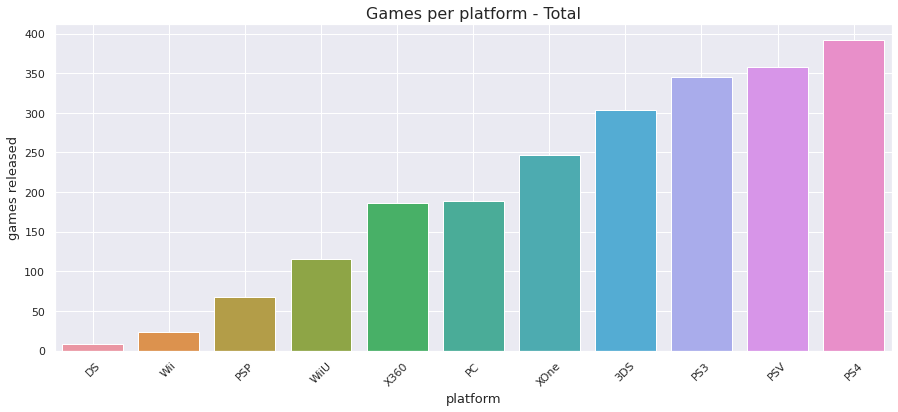

In [56]:
platform_games_released = (
    eda
    .pivot_table(
        index='platform', 
        values='name', 
        aggfunc='count')
    .sort_values('name')
)

plt.figure(figsize=(15,6))

sns.barplot(
    x = platform_games_released.index, 
    y = platform_games_released['name']
)

plt.title('Games per platform - Total', fontsize=16)
plt.xlabel('platform', fontsize=13)
plt.xticks(rotation=45)
plt.ylabel('games released', fontsize=13)
plt.grid(visible=True)
plt.show()

Три лидирующих позиции списка занимают консоли фирмы "Sony" - `PS4`, `PSV` и `PS3`, далее первую шестерку замыкают `3DS` и `Xbox One`. Каждая из платформ имеет более 200 выпущенных игр на актуальный период, что можно считать достаточным для проведения дальнейшего исследования. 

Далее создадим датафрейм с платформами, на которых больше 200 игр; добавим информацию о глобальных продажах, оценках пользователей и критиков; и удалим данные об играх, где нет хотя бы одной из оценок - так как такие игры только исказят результаты:

In [57]:
top_list = (
    platform_games_released
    .reset_index()
    .query('name > 200')['platform']
    .to_list()
)


top_games_count_platforms = (
    
    eda[eda['platform']
         .isin(top_list)]
    .reset_index(drop=True)
    .pivot_table(index=['platform', 'name'], values=['total_sales', 'critic_score', 'user_score'])
    .dropna()
    .reset_index()
)

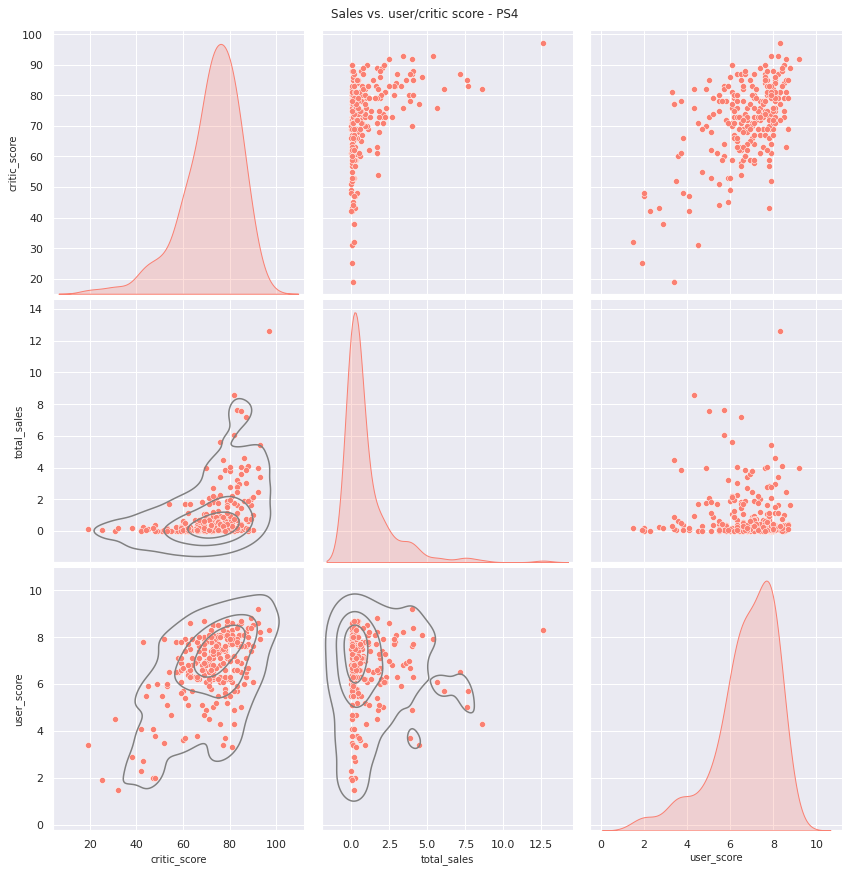

In [58]:
# больше всего игр было выпущено на Playstation 4 - изучим её первой

g = (
    sns.pairplot(
        top_games_count_platforms[top_games_count_platforms['platform'] == 'PS4'],
        height=4,
        aspect=1, 
        diag_kind="kde")
)
g.map_lower(sns.kdeplot, levels=4, color=".5")

g.fig.suptitle("Sales vs. user/critic score - PS4", y=1.01, fontsize=12)
plt.grid(visible=True)
plt.show()

График изучает зависимость продаж от оценок, но корреляция явно невысока: игр с рейтингом пользователей меньше 5 и оценкой критиков меньше 50 намного меньше, чем всех остальных - потому и большинство продаж приходится на игры с более высоким рейтингом. Тем не менее, пики продаж приходятся на игры с оценками выше 7/70. Намного большая корреляция наблюдается между оценками пользователей и критиков - картина влияния на уровень продаж очень схожа.

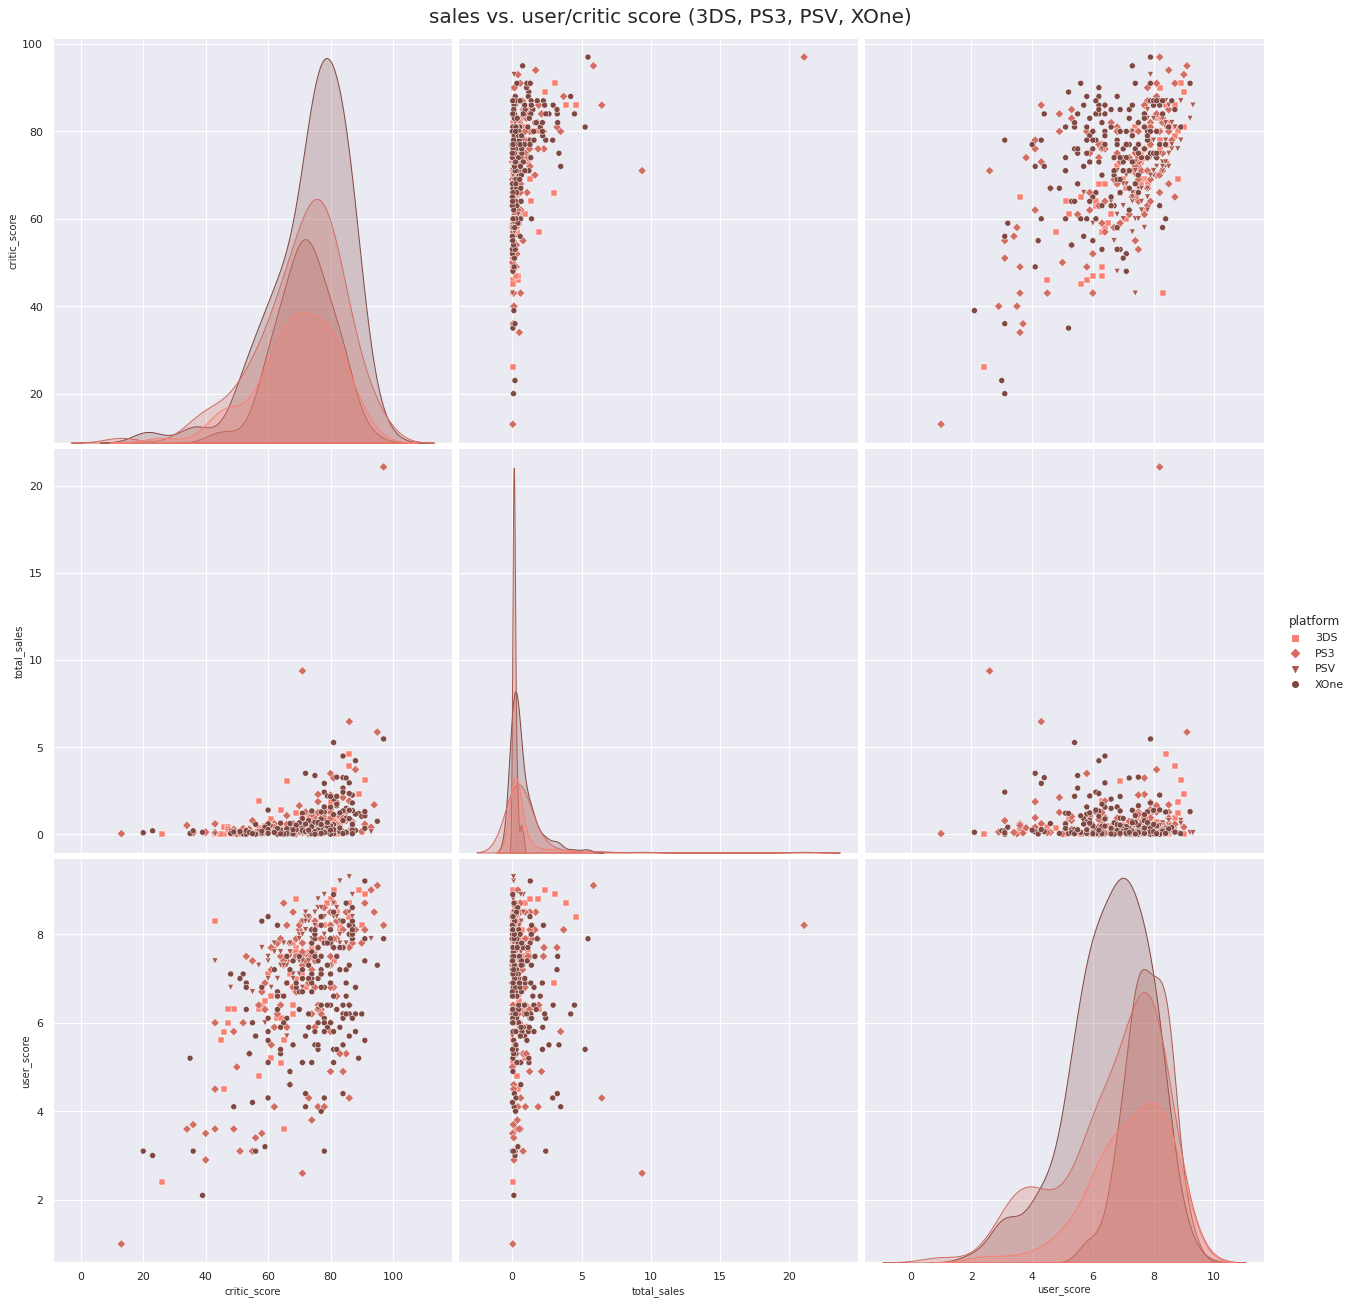

In [59]:
# посмотрим остальные четыре платформы

g = (
    sns.pairplot(
        top_games_count_platforms[top_games_count_platforms['platform'] != 'PS4'],
        kind='scatter',
        height=6,
        aspect=1,
        hue='platform',
        diag_kind='kde',
        markers=['s', 'D', 'v', 'o']
    )
)

sns.set_palette("bright")
g.fig.suptitle("sales vs. user/critic score (3DS, PS3, PSV, XOne)", y=1.01, fontsize=20)
plt.grid(visible=True)
plt.show()

Ситуация схожа с `PS4` - несмотря на наличие пиков продаж у игр с более низкими оценками, в целом распределение значений очень похоже. Необходимо посчитать точную корреляцию значений таблицы для финальных выводов:

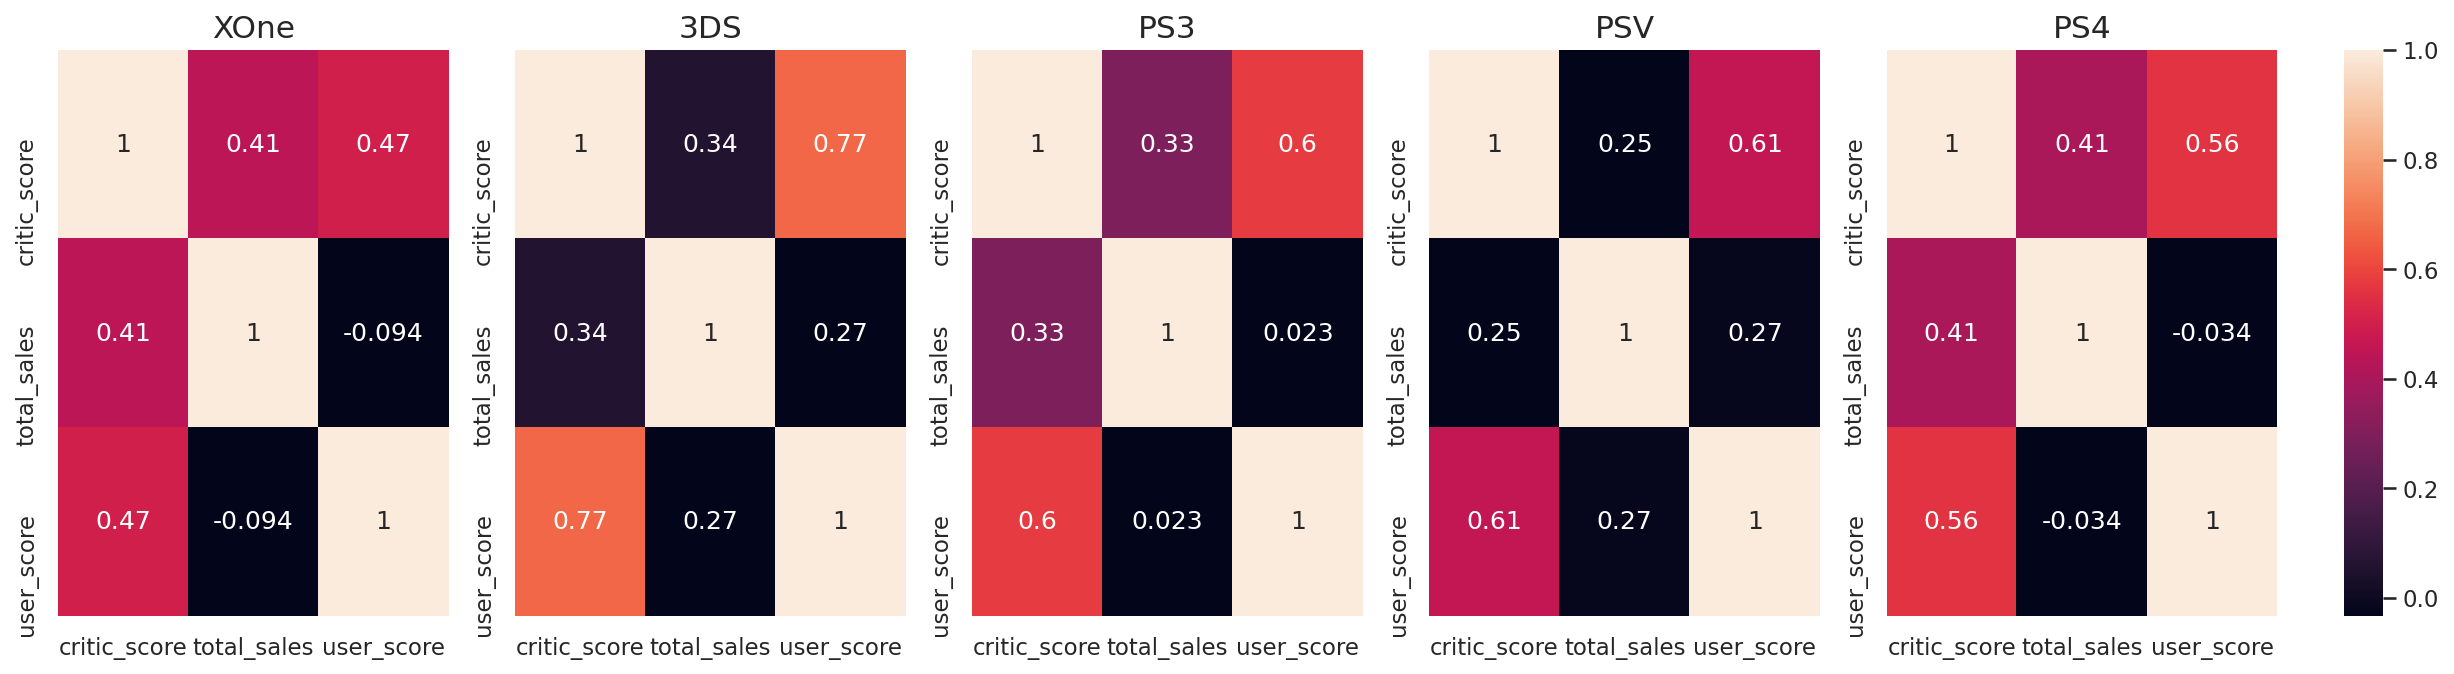

In [60]:
# визуализируем корреляцию данных на всех платформах c помощью функции

def corr_heat (platform, ax):
    
    if ax != ax5:
        g = (
            sns.heatmap(
                top_games_count_platforms[top_games_count_platforms['platform'] == platform]
                .corr(),
                annot=True,
                cbar=False,
                ax=ax)
            )
    else:
        g = (
            sns.heatmap(
                top_games_count_platforms[top_games_count_platforms['platform'] == platform]
                .corr(),
                annot=True,
                cbar_ax=axcb,
                ax=ax)
            )
        
    return g


f,(ax1, ax2, ax3, ax4, ax5, axcb) = plt.subplots(1, 6, figsize=(20,5), dpi=150,
            gridspec_kw={'width_ratios':[1, 1, 1, 1, 1, 0.1]})

ax1.get_shared_y_axes().join(ax2, ax3, ax4, ax5)

g1 = corr_heat(top_list[0], ax1).set_title(top_list[0])
g2 = corr_heat(top_list[1], ax2).set_title(top_list[1])
g3 = corr_heat(top_list[2], ax3).set_title(top_list[2])
g4 = corr_heat(top_list[3], ax4).set_title(top_list[3])
g5 = corr_heat(top_list[4], ax5).set_title(top_list[4])


plt.show()

---

- Рейтинги пользователей и оценки критиков не имеют значительного влияния на уровень продаж - несмотря на то, что самые продаваемые игры чаще всего высоко оценены, анализ данных не показывает значительной корреляции. Интересная особенность - схожие показатели платформ `PS4` и `XOne` (незначительная отрицательная корреляция продаж и рейтингов пользователей, корреляция с оценками критиков на уровне ~0.4) - поскольку эти платформы являются самыми актуальными в выборке, это даёт повод сделать предположение об изменении уровня корреляции этих показателей в зависимости от этапа жизненного цикла платформы.

### Оценка прибыльности игр в разрезе жанров

Далее мы рассмотрим возможные взаимосвязи между количеством продаж и жанрами представленных видеоигр. Построим два графика: количество выпущенных игр в каждом жанре и средний уровень продаж для жанра:

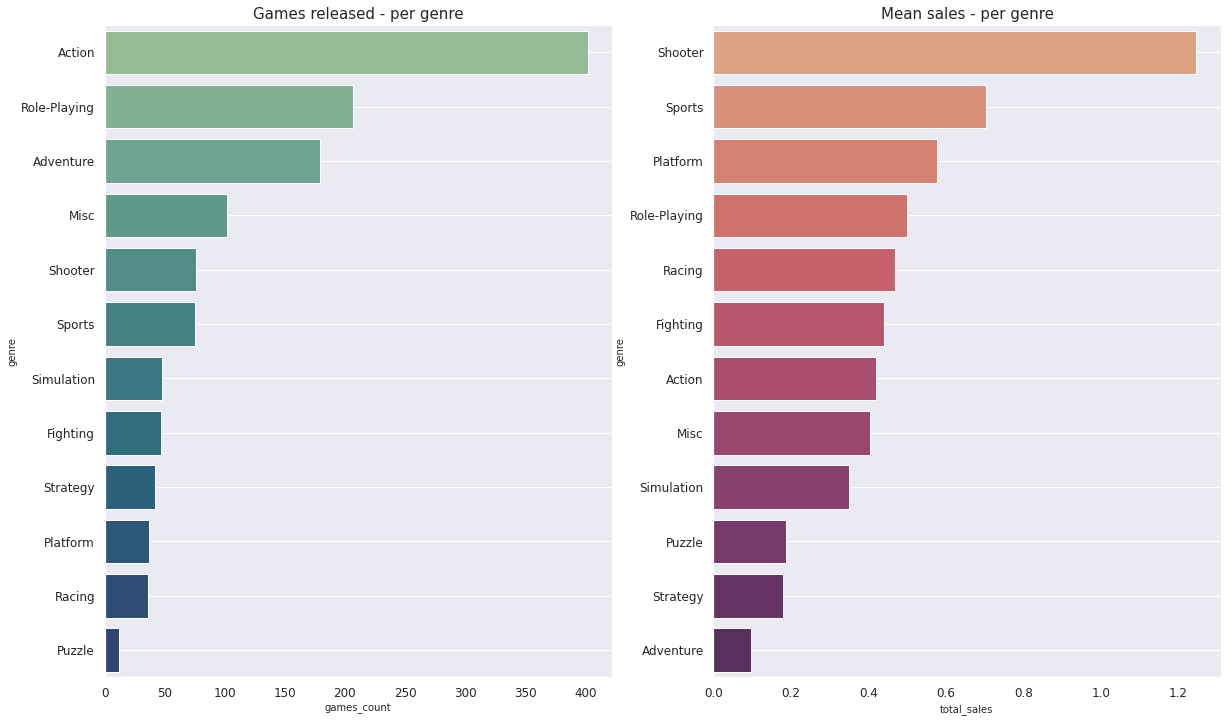

In [61]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,12))

genre_data = (
    eda
    .pivot_table(
        index='genre', 
        values=['name', 'total_sales'], 
        aggfunc={'name':'nunique', 'total_sales':'mean'})
    .rename(columns={'name':'games_count'})
    .sort_values('total_sales', ascending=False)
    .reset_index()
)

sns.barplot(
    data=genre_data
    .sort_values('games_count', ascending=False),
    y='genre', 
    x='games_count',
    palette='crest',
    ax=ax1
)

sns.barplot(
    data=genre_data, 
    y='genre', 
    x='total_sales',
    palette='flare',
    ax=ax2
)

ax1.set_title('Games released - per genre', fontsize=15)
ax2.set_title('Mean sales - per genre', fontsize=15)


for ax in (ax1, ax2):
    ax.grid()   
    ax.tick_params(labelsize=12)

- Лидирующие жанры по количеству выпущенных игр и средних продаж не имеют ничего общего. Например, несмотря на то, что жанр `Action` является самым крупным по количеству выпущенных игр, по среднему объёму глобальных продаж он лишь на пятом месте, у жанра `Shooter` ситуация зеркальная. 

Посмотрим на показатели продаж поподробнее:

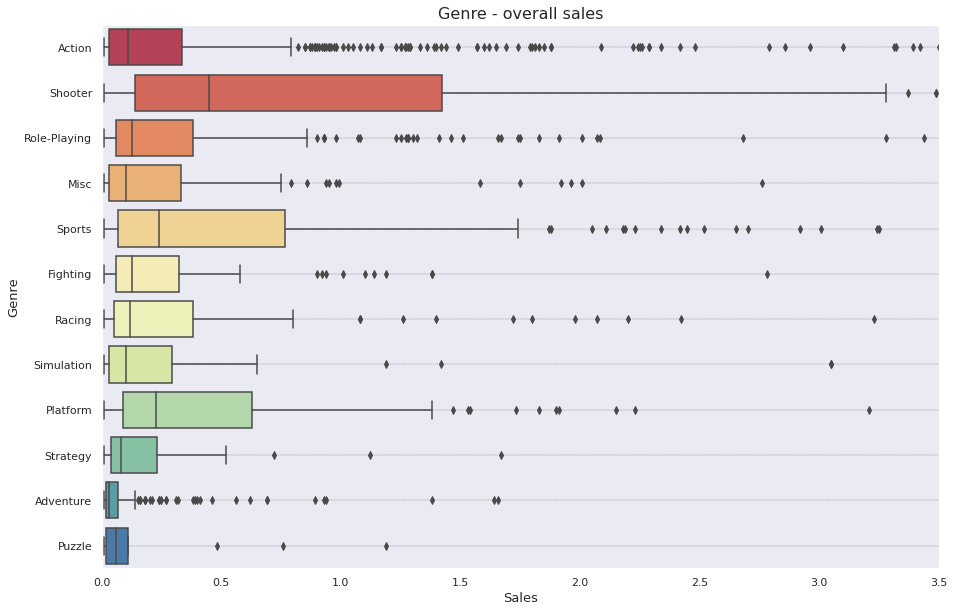

In [62]:
plt.figure(figsize=[15,10])

sns.boxplot(
    data=eda.sort_values('total_sales', ascending=False),
    y='genre',
    x='total_sales',
    palette='Spectral'
)


plt.title('Genre - overall sales', fontsize=16)
plt.ylabel('Genre', fontsize=13)
plt.xlabel('Sales', fontsize=13)
plt.grid(color='k', linestyle='-.', linewidth = 0.2)
plt.xlim(0, 3.5)
plt.show()

---

- Для всех жанров характерна отрицательная скошенность распределения и большое количество выбросов за пределами третьего квартиля. Из-за этого медианые и средние сильно отличаются (на примере `Shooter`: среднее значение (график 1) превышает медиану (график 2) более чем в два раза).


- В тройку самых прибыльных жанров входят `Shooter`, `Sports` и `Platform`. При этом по количеству выпущенных игр эти жанры не занимают лидирующие позиции, что делает такие игры потенциально самыми прибыльными и в целом характеризует как более привлекательный продукт.


- Совершенно обратная ситуация у жанров `Adventure` и `Action`: при самых высоких показателях количества выпущенных игр, средняя глобальная выручка `Adventure` находится на последнем месте. Для жанра `Action` показатели находятся в середине списка, что сравнительно лучше - но на диаграмме размаха становится видно что финансовый успех жанра больше связан с аномально успешными играми-выбросами, чем с потенциальной привлекательностью для пользователей или количеством выпущенных игр. Так как средние показатели данных жанров оставляют желать лучшего; есть опасения по поводу текущей перенасыщенности данными жанрами игрового рынка; и оба жанра в разных мерах, но зависимы от аномально успешных игр, чем от привлекательности для пользователя -  делать серьёзные вложения в продвижение данных жанров представляется нецелесообразным.

---

### Выводы и наблюдения: Исследовательский анализ данных

---

Исследовательский анализ проходил в четыре этапа. Далее приведены выводы и наблюдения каждого из них:


**Этап 1 - Актуальный период:**


Исходя из наблюдений и графиков, можно сделать следующие выводы:

- Новые консоли выходят с периодичностью в 5-6 лет, а находятся на рынке видеоигр в среднем около 10 лет.


- Самые низкие значения продаж игр для консолей часто приходятся в начале и конце жизни консоли - первый год и последние два.


- Самые высокие значения продаж игр для консолей обычно приходятся на отметку в 3-5 лет на рынке, далее идет спад.


- К 2015 году только три из шести лидирующих консолей продолжают заметно участвовать на игровом рынке - при этом все три уже подходят к концу своих жизненных циклов. 


- Актуальным периодом для данного исследования является 2013-2016 год: так как в данных датасета наблюдается цикличная природа игровых консолей, а данный промежуток совпадает с выходом нескольких консолей одного поколения - мы можем использовать наблюдения за консолями прошлых поколений и экстраполировать как относительно точные выводы на 2017 год, так и общие тренды на ближайшее будущее.


**Этап 2 - Анализ прибыльности платформ:**


На основе наблюдений из графиков, мы можем выделить 3 потенциально прибыльные платформы на 2017 год - самой потенциально прибыльной платформой является **`PS4`**, в тройку также входят **`Xbox One`** и **`3DS`**:

- **`PlayStation 4`** является абсолютным лидером среди потенциально прибыльных платформ, показывая самые высокие абсолютные и относительные показатели продаж видеоигр за наблюдаемый период. Платформа явно находится в самом расцвете своего жизненного цикла (согласно расчетам, пиковые значения продаж для консоли ожидаются как раз в 2017-2018 годах), а падение в 2016 году может быть обусловлено двумя факторами, не связанными с самой платформой: общий спад количества выпущенных игр после 2010 года, а также возможной неполнотой данных датасета (согласно примечанию от заказчика). 


- **`Xbox One`** занимает второе место в списке - динамика глобальных продаж похожа на `PS4`, но с гораздо меньшими абсолютными значениями и масштабом. Платформа также будет актуальна ещё несколько лет, а причины падения скорее всего идентичны ситуации `PS4`. Размах значений сопоставим с `3DS`, которая вышла на два года раньше.


- **`Nintendo 3DS`** имеет довольно высокий уровень продаж в 2013-ом году, но далее идет на спад - это может быть связано с тем, что консоль была выпущена на три года раньше других из списка и могла уже пройти пик жизненного цикла. Абсолютные показатели и диаграмма размаха несильно уступают `Xbox One`, но обе консоли сильно отстают от лидера списка по всем значениям. 


Остальные консоли из списка (`Wii U`, `PC` и `PSV`) показывают значения продаж сильно ниже упомянутых трех консолей - но в рамках данных датасета это все равно означает продажи в десятки миллионов копий, что не мало. 


**Этап 3 - Рейтинг игр и количество продаж:**


- Рейтинги пользователей и оценки критиков не имеют значительного влияния на уровень продаж - несмотря на то, что самые продаваемые игры чаще всего высоко оценены, анализ данных не показывает значительной корреляции. 

Интересная особенность - схожие показатели платформ `PS4` и `XOne` (незначительная отрицательная корреляция продаж и рейтингов пользователей, корреляция с оценками критиков на уровне ~0.4) - поскольку эти платформы являются самыми актуальными в выборке, это даёт повод сделать предположение об изменении уровня корреляции этих показателей в зависимости от этапа жизненного цикла платформы.


**Этап 4 - Прибыльность игр в разрезе жанров:**


- В тройку самых прибыльных жанров входят `Shooter`, `Sports` и `Platform`. При этом по количеству выпущенных игр эти жанры не занимают лидирующие позиции, что делает такие игры потенциально самыми прибыльными и в целом характеризует как более привлекательный продукт.


- Совершенно обратная ситуация у жанров `Adventure` и `Action`: при самых высоких показателях количества выпущенных игр, средняя глобальная выручка `Adventure` находится на последнем месте. Для жанра `Action` показатели находятся в середине списка, что сравнительно лучше - но на диаграмме размаха становится видно что финансовый успех жанра больше связан с аномально успешными играми-выбросами, чем с потенциальной привлекательностью для пользователей или количеством выпущенных игр. Так как средние показатели данных жанров оставляют желать лучшего; есть опасения по поводу текущей перенасыщенности данными жанрами игрового рынка; и оба жанра в разных мерах, но зависимы от аномально успешных игр, чем от привлекательности для пользователя -  делать серьёзные вложения в продвижение данных жанров представляется нецелесообразным.


---

<a id='4'></a>
## Портрет пользователей регионов NA, EU и JP

[*Вернуться к оглавлению*](#0)

На данном этапе работы мы попробуем выявить и охарактеризовать предпочтения среди пользователей игровых консолей. Работа будет проведена в три этапа:

1) Определение топ-5 самых популярных платформ в регионе

2) Определение топ-5 самых популярных жанров в регионе

3) Влияние рейтинга ESRB на уровень продаж 

### Самые популярные платформы (топ-5)

Для всех трёх этапов данные можно сгруппировать и визуализировать схожим образом, потому для оптимизации процесса напишем несколько функций:

In [63]:
# функция для группировки данных

def region_group(index): 
    regions = (
        eda
        .pivot_table(
            index=index, 
            values=['na_sales', 'eu_sales', 'jp_sales'], 
            aggfunc='sum')
    )
    return regions

# функция для отбора топ-5

def top_5 (region_sales):
    
    top_5 = (
        regions[region_sales]
        .sort_values(ascending=False)[:5]
    )
    return top_5

# визуализация работы предыдущих функций

def top_plot(region_sales, ax, palette='flare'):

    sns.barplot(
        y=top_5(region_sales).values, 
        x= top_5(region_sales).index,
        palette=palette,
        ax=ax
    )

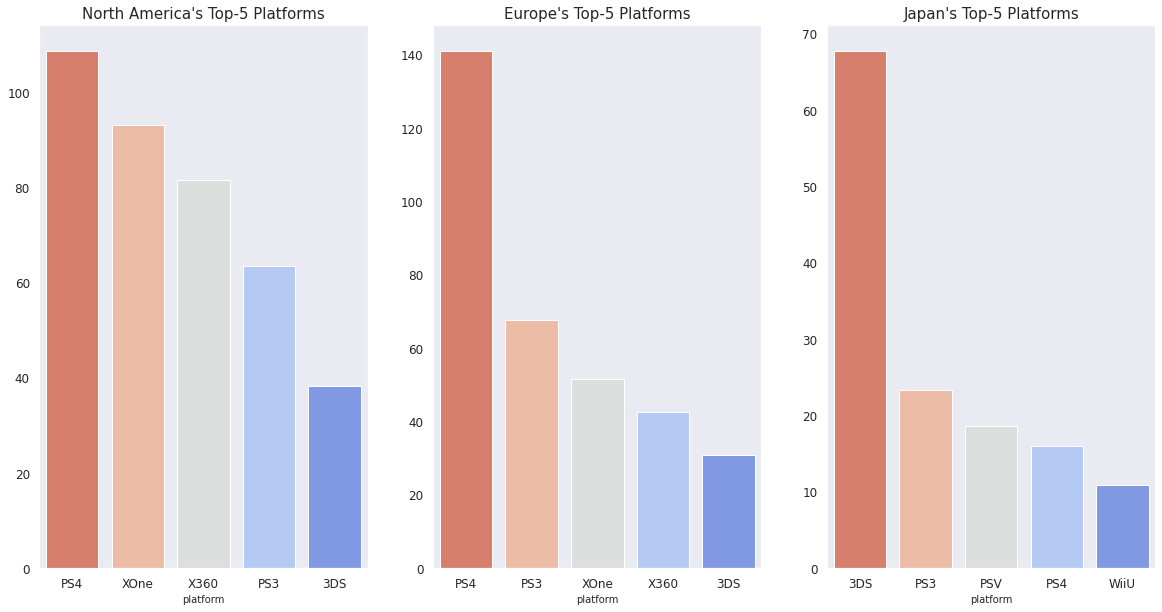

na_sales   437.75
eu_sales   392.25
jp_sales   140.75
dtype: float16

In [64]:
fig,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

regions = region_group('platform')
top_plot('na_sales', ax1, 'coolwarm_r')
top_plot('eu_sales', ax2, 'coolwarm_r')
top_plot('jp_sales', ax3, 'coolwarm_r')

ax1.set_title("North America's Top-5 Platforms", fontsize=15)
ax2.set_title("Europe's Top-5 Platforms", fontsize=15)
ax3.set_title("Japan's Top-5 Platforms", fontsize=15)


for ax in (ax1, ax2, ax3):
    ax.grid(axis='y', linewidth=2, color='m')   
    ax.tick_params(labelsize=12)


plt.show()    

(
    region_group('platform')
    .sum()
    .sort_values(ascending=False)
)

- На рынке Северной Америки первые две строчки занимают `PS4` и `Xbox One`, что лишний раз подтверждает их актуальность. Тем не менее следующие две консоли пренадлежат к "седьмому поколению домашних игровых платформ", которые вышли в 2005-2006-ых годах. Другими словами - они намного менее актуальны, чем `3DS`, занимающая последнее место в топе. По уровню общего объёма продаж игр на всех платформах регион является абсолютным лидером.


- Топ-5 рынка Европы имеет такой же состав платформ и практически такое же распределение между ними, за исключением смещения `PS3` с четвёртого места на второе. Это делает её популярнее более актуальной `Xbox One` и прямого конкурента седьмого поколения `Xbox 360`. В целом общий объём продаж сопоставим с Северной Америкой, но отдельный показатель `PS4` здесь намного выше.


- Японский рынок значительно отличатся от остальных - на нём с большим отрывом лидирует `3DS`, составляя почти половину всех игровых продаж в регионе. Другие актуальные консоли здесь не так популярны - `PS4` находится на четвёртом месте, `Xbox One` не представлена вовсе - все платформы в топе региона произведены японскими компаниями. Такое лидерство `3DS` может быть объяснено возможной ориентацией этого продукта на внутренний рынок, что объяснило бы также её отставание в других регионах. Общий объём игровых продаж примерно в 3 раза меньше Американского.


Дополнительно, можно отметить следующие тенденции: 

1) Регион Северной Америки отличается большими общими обьемами продаж, но сравнительно меньшим отрывом между консолями, тогда как в европейском и японском регионах есть явные лидеры продаж с заметным отрывом от остальных конкурентов.

2) Регионы Северной Америки и Европы больше предпочитают станционарные/домашние консоли, а пользователи Японии склоняются к портативным платформам - `PSV` здесь находится на третьем месте по продажам, отсутствуя в топах других регионов.

### Самые популярные жанры (топ-5)

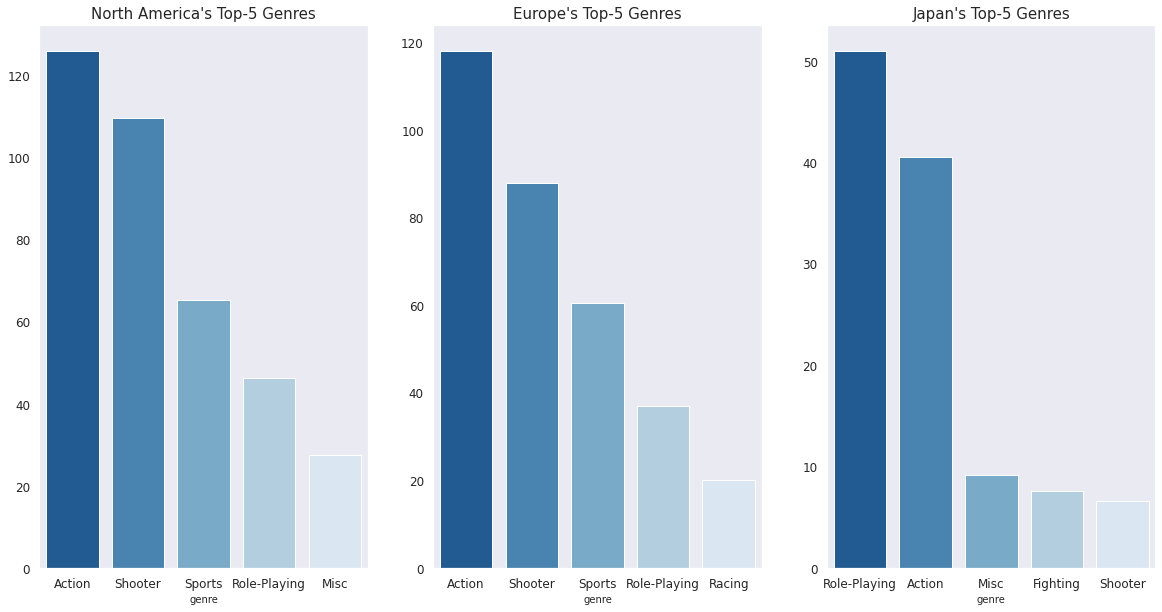

In [65]:
fig,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

regions = region_group('genre')
top_plot('na_sales', ax1, 'Blues_r')
top_plot('eu_sales', ax2, 'Blues_r')
top_plot('jp_sales', ax3, 'Blues_r')

ax1.set_title("North America's Top-5 Genres", fontsize=15)
ax2.set_title("Europe's Top-5 Genres", fontsize=15)
ax3.set_title("Japan's Top-5 Genres", fontsize=15)


for ax in (ax1, ax2, ax3):
    ax.grid(axis='y', linewidth=2, color='m')   
    ax.tick_params(labelsize=12)

plt.show()

- Топ жанров Северной Америки схож с общемировым топом жанров по продажам - поскольку этот регион является крупнейшим рынком видеоигр, он явно влияет на мировые тенденции в этом направлении. Довольно много игр представлено в жанре `Misc` (англ. "miscellaneous", букв. "различное, смешанное") - это игры различных специфичных жанров, которые сложно выделить в какую-то крупную категорию (например, различные музыкальные/танцевальные игры).


- Топ жанров Европы идентичен Северной Америке, за исключением `Racing` на пятом месте (вместо `Misc`). Соотношение распределения жанров также очень схоже.


- Рынок Японии снова отличился - с большим отрывом лидируют ролевые игры (`Role-Playing`), один из самых популярных жанров в мире `Shooter` находится на последнем месте, но зато есть `Fighting` (в топах других регионов не представлен).

### Влияние рейтинга ESRB на продажи

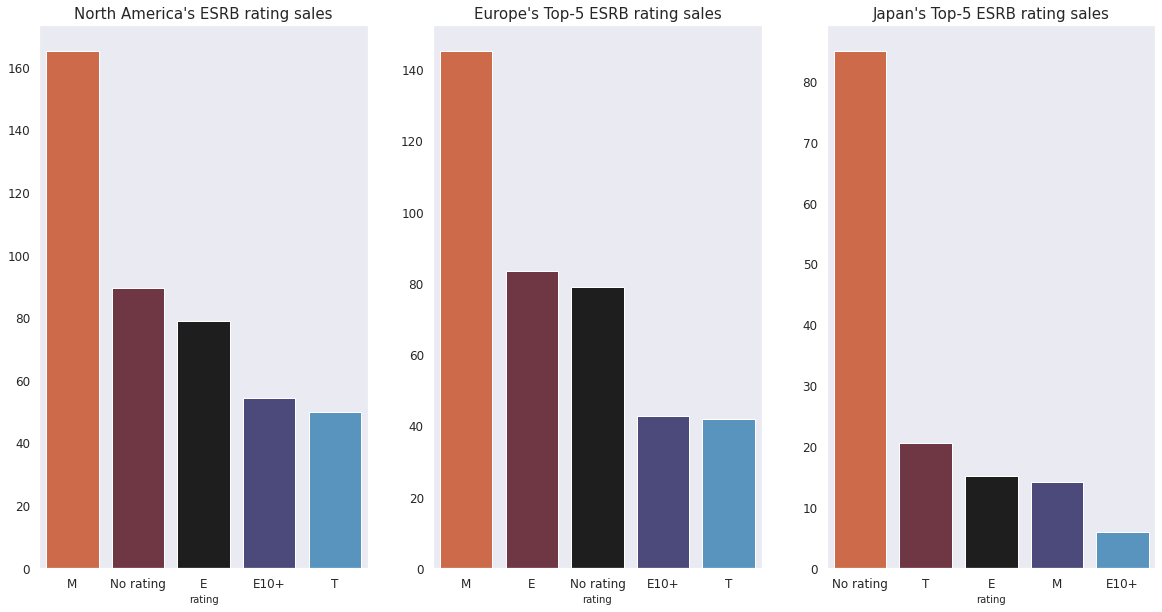

In [66]:
fig,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

regions = region_group('rating')
top_plot('na_sales', ax1, 'icefire_r')
top_plot('eu_sales', ax2, 'icefire_r')
top_plot('jp_sales', ax3, 'icefire_r')

ax1.set_title("North America's ESRB rating sales", fontsize=15)
ax2.set_title("Europe's Top-5 ESRB rating sales", fontsize=15)
ax3.set_title("Japan's Top-5 ESRB rating sales", fontsize=15)


for ax in (ax1, ax2, ax3):
    ax.grid(axis='y', linewidth=2, color='m')   
    ax.tick_params(labelsize=12)

Рейтинг ESRB прежде всего означает возрастной рейтинг игры, присваемой ей при выпуске в Северной Америке. В других основных регионах действуют собственные рейтинговые системы: [PEGI](https://en.wikipedia.org/wiki/PEGI) в Европе и [CERO](https://en.wikipedia.org/wiki/Computer_Entertainment_Rating_Organization) в Японии, чем скорее всего и обусловлено большое количество пропусков - либо у игр не было рейтинга ESRB вовсе в связи с отсутствием на американском рынке, или же сбор данных не учитывал различие между рейтингами (если сбор данных о рейтингах ESRB вёлся посредством парсинга веб-страниц разработчиков игр, то там мог указан только рейтинг местной организации, потому в данных образовался пропуск - таким образом можно предположить, что пропуски в Северной Америке могут состоять из игр, которые произведены компаниями из других регионов).

Таким образом делать более полные выводы по имеющимся данным будет сложно - нельзя исключать разницу в оценочных критериях разных организаций, из-за чего одной и той же игре может быть присвоен разный рейтинг в разных регионах.

По имеющимся данным можно сделать следующией предположения:

- Рейтинг `M` (17+) является лидером Европы и Северной Америки. В целом распределения этих регионов выглядит схоже.


- В отличии от других регионов, в Японии жанр `T` (13+) преобладает над остальными.

### Выводы и наблюдения: Портрет пользователей регионов

---


**1. Популярность платформ:**



- На рынке Северной Америки первые две строчки занимают `PS4` и `Xbox One`, что лишний раз подтверждает их актуальность. Тем не менее следующие две консоли пренадлежат к "седьмому поколению домашних игровых платформ", которые вышли в 2005-2006-ых годах. Другими словами - они намного менее актуальны, чем `3DS`, занимающая последнее место в топе. По уровню общего объёма продаж игр на всех платформах регион является абсолютным лидером.


- Топ-5 рынка Европы имеет такой же состав платформ и практически такое же распределение между ними, за исключением смещения `PS3` с четвёртого места на второе. Это делает её популярнее более актуальной `Xbox One` и прямого конкурента седьмого поколения `Xbox 360`. В целом общий объём продаж сопоставим с Северной Америкой, но отдельный показатель `PS4` здесь намного выше.


- Японский рынок значительно отличатся от остальных - на нём с большим отрывом лидирует `3DS`, составляя почти половину всех игровых продаж в регионе. Другие актуальные консоли здесь не так популярны - `PS4` находится на четвёртом месте, `Xbox One` не представлена вовсе - все платформы в топе региона произведены японскими компаниями. Такое лидерство `3DS` может быть объяснено возможной ориентацией этого продукта на внутренний рынок, что объяснило бы также её отставание в других регионах. Общий объём игровых продаж примерно в 3 раза меньше Американского.


Дополнительно, можно отметить следующие тенденции: 

1) Регион Северной Америки отличается большими общими обьемами продаж, но сравнительно меньшим отрывом между консолями, тогда как в европейском и японском регионах есть явные лидеры продаж с заметным отрывом от остальных конкурентов.

2) Регионы Северной Америки и Европы больше предпочитают станционарные/домашние консоли, а пользователи Японии склоняются к портативным платформам - `PSV` здесь находится на третьем месте по продажам, отсутствуя в топах других регионов.



**2. Популярность жанров:**



- Топ жанров Северной Америки схож с общемировым топом жанров по продажам - поскольку этот регион является крупнейшим рынком видеоигр, он явно влияет на мировые тенденции в этом направлении. Довольно много игр представлено в жанре `Misc` (англ. "miscellaneous", букв. "различное, смешанное") - это игры различных специфичных жанров, которые сложно выделить в какую-то крупную категорию (например, различные музыкальные/танцевальные игры).


- Топ жанров Европы идентичен Северной Америке, за исключением `Racing` на пятом месте (вместо `Misc`). Соотношение распределения жанров также очень схоже.


- Рынок Японии снова отличился - с большим отрывом лидируют ролевые игры (`Role-Playing`), один из самых популярных жанров в мире `Shooter` находится на последнем месте, но зато есть `Fighting` (в топах других регионов не представлен).



**3. Влияние рейтинга ESRB:**



Рейтинг ESRB прежде всего означает возрастной рейтинг игры, присваемой ей при выпуске в Северной Америке. В других основных регионах действуют собственные рейтинговые системы: [PEGI](https://en.wikipedia.org/wiki/PEGI) в Европе и [CERO](https://en.wikipedia.org/wiki/Computer_Entertainment_Rating_Organization) в Японии, чем скорее всего и обусловлено большое количество пропусков - либо у игр не было рейтинга ESRB вовсе в связи с отсутствием на американском рынке, или же сбор данных не учитывал различие между рейтингами (если сбор данных о рейтингах ESRB вёлся посредством парсинга веб-страниц разработчиков игр, то там мог указан только рейтинг местной организации, потому в данных образовался пропуск - таким образом можно предположить, что пропуски в Северной Америке могут состоять из игр, которые произведены компаниями из других регионов).

Таким образом делать более полные выводы по имеющимся данным будет сложно - нельзя исключать разницу в оценочных критериях разных организаций, из-за чего одной и той же игре может быть присвоен разный рейтинг в разных регионах.

По имеющимся данным можно сделать следующией предположения:

- Рейтинг `M` (17+) является лидером Европы и Северной Америки. В целом распределения этих регионов выглядит схоже.


- В отличии от других регионов, в Японии жанр `T` (13+) преобладает над остальными.

<a id='5'></a>
## Проверка гипотез

[*Вернуться к оглавлению*](#0)

Финальным этапом данного исследования является проверка заданных заказчиком гипотез:


1) Средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые;


2) Средние пользовательские рейтинги жанров `Action` (англ. «действие», экшен-игры) и `Sports` (англ. «спортивные соревнования») разные.

### Гипотеза №1: "Средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые."

Перед проверкой гипотезы посмотрим на распределение пользовательских рейтингов в разрезе платформ:

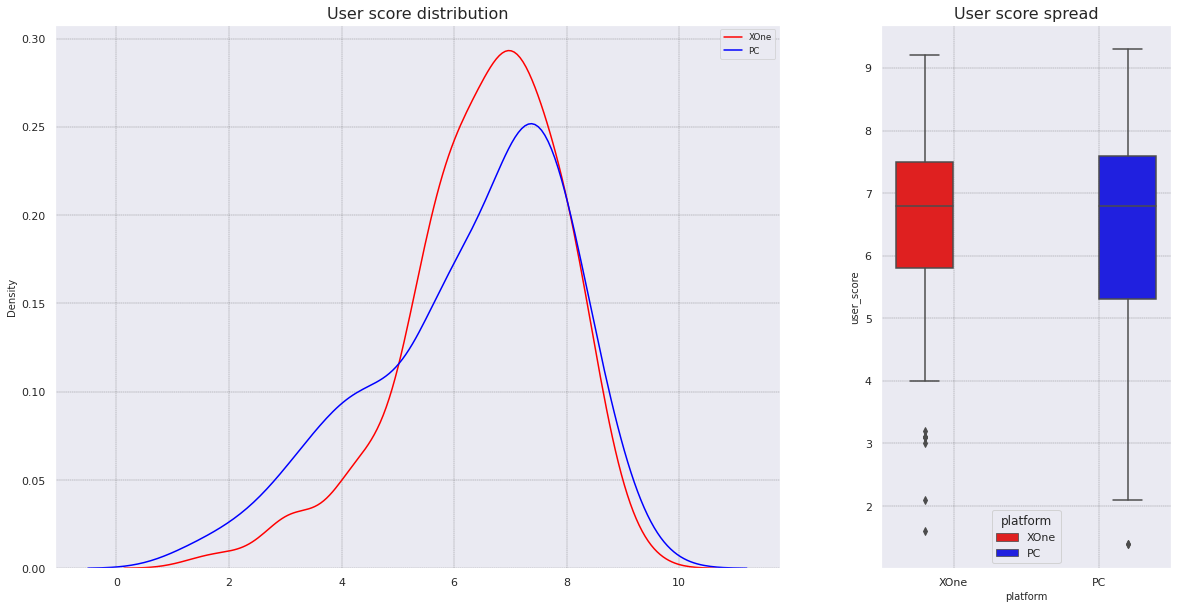

,mean,std,var
platform,,,
PC,6.27,1.74,3.04
XOne,6.52,1.38,1.91


In [67]:
xbox = (
    eda[eda['platform'] == 'XOne']['user_score']
    .dropna()
    .values
)

pc = (
    eda[eda['platform'] == 'PC']['user_score']
    .dropna()
    .values
)


f,(ax1, ax2) = plt.subplots(1, 2, figsize=(20,10), 
                            gridspec_kw={'width_ratios':[1, 0.4]})
# строим гистограмму
    
sns.kdeplot(xbox, alpha=0.8, label='XOne', 
             color='red', ax=ax1)

sns.kdeplot(pc, alpha=0.3, label='PC', 
             color='blue', ax=ax1)


#строим диаграмму размаха

sns.boxplot(
    data=(
        eda[eda['platform']
            .isin(['XOne', 'PC'])]),
    x='platform', 
    y='user_score', 
    hue='platform',
    palette=['red', 'blue'],
    orient='v',
    ax=ax2
)

sns.set_context('paper')

# выводим результат

ax1.set_title('User score distribution', fontsize=16)
ax1.legend()
ax2.set_title('User score spread', fontsize=16)

for ax in (ax1, ax2):
    ax.grid(visible=True,
            color='black', 
            linestyle='-.', 
            linewidth = 0.2)
plt.show()

# посчитаем статистические параметры

(
    eda[eda['platform']
         .isin(['XOne', 'PC'])]
    .pivot_table(
        index=['platform'],
        values=['user_score'],
        aggfunc=['mean', 'std', 'var'])
    .droplevel(1, axis=1)
)


- Графики обоих платформ показывают нормальное распределение с отрицательной ассиметрей - скорее всего это обусловленно выбросами за пределами первых квартилей, которые можно увидеть на диаграмме размаха.

- Несмотря на небольшую разницу в абсолютных средних значениях, высшая точка распределения `PC` показывает большее значение, чем `XOne`.

- Медиана `PC` также выше, но при этом размах нормальных значений намного шире - оценки ниже 4 находятся в пределах нормы, в отличии от `XOne`.

- Уровень стандартного отклонения на обоих графиках говорит о низком разбросе данных.

Проверим гипотезу о том, что средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые. Так как средние значения выборки находятся на примерно одном уровне, такой исход вполне возможем. Хоть среднее у `PC` немногим больше, проверим гипотезу в обе стороны. Таким образом:

**0. Нулевая гипотеза:**

Средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые.


**1. Альтернативная гипотеза:**

Средние пользовательские рейтинги платформ `Xbox One` и `PC` различаются.


Проверим гипотезу о равенстве среднего двух независимых генеральных совокупностей по взятым из них выборкам (t-тест):

In [68]:
alpha = .05 # установим стандартный уровень статистической значимости

results = st.ttest_ind(xbox, pc, equal_var=False) # у выборок разная дисперсия, уточняем

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-value: 0.14414213365247552
Не получилось отвергнуть нулевую гипотезу


- Анализ имеющихся данных о рейтингах пользователей показал статистически значимую вероятность равенства средних значений генеральной совокупности платформ XOne и PC (p-value ~ 0.15%). Нулевую гипотезу о равенстве средних пользовательских рейтингов платформ `Xbox One` и `PC` отвергнуть не получилось.

### Гипотеза №2: "Средние пользовательские рейтинги жанров `Action` и `Sports` разные."

Перед проверкой гипотезы посмотрим на распределение пользовательских рейтингов в разрезе платформ:

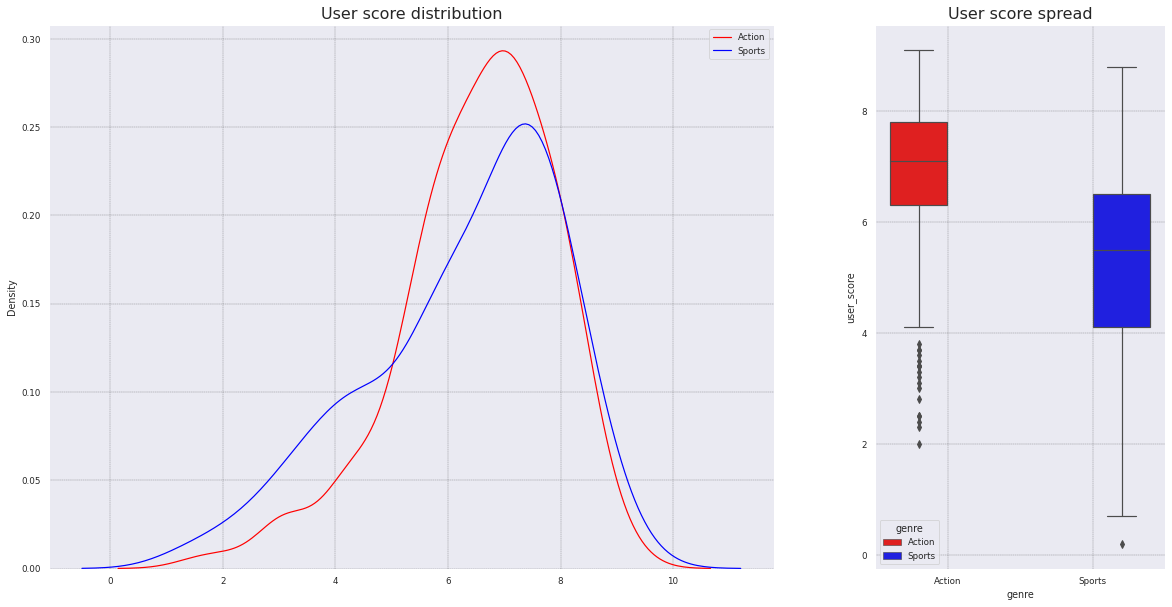

,mean,std,var
genre,,,
Action,6.84,1.33,1.77
Sports,5.24,1.78,3.18


In [69]:
action = (
    eda[eda['genre'] == 'Action']['user_score']
    .dropna()
    .values
)

sports = (
    eda[eda['genre'] == 'Sports']['user_score']
    .dropna()
    .values
)


f,(ax1, ax2) = plt.subplots(1, 2, figsize=(20,10), 
                            gridspec_kw={'width_ratios':[1, 0.4]})
# строим гистограмму
    
sns.kdeplot(xbox, alpha=0.8, label='Action', 
             color='red', ax=ax1)

sns.kdeplot(pc, alpha=0.3, label='Sports', 
             color='blue', ax=ax1)


#строим диаграмму размаха

sns.boxplot(
    data=(
        eda[eda['genre']
            .isin(['Action', 'Sports'])]),
    x='genre', 
    y='user_score', 
    hue='genre',
    palette=['red', 'blue'],
    orient='v',
    ax=ax2
)

sns.set_context('paper')

# выводим результат

ax1.set_title('User score distribution', fontsize=16)
ax1.legend()
ax2.set_title('User score spread', fontsize=16)

for ax in (ax1, ax2):
    ax.grid(visible=True,
            color='black', 
            linestyle='-.', 
            linewidth = 0.2)
plt.show()

# посчитаем статистические параметры

(
    eda[eda['genre']
         .isin(['Action', 'Sports'])]
    .pivot_table(
        index=['genre'],
        values=['user_score'],
        aggfunc=['mean', 'std', 'var'])
    .droplevel(1, axis=1)
)

- Ситуация очень похожа на картину сравнения распределения пользовательского рейтинга между платформами - графики также показывают нормальное распределение с отрицательной ассиметрей, имеются выбросы за пределами первых квартилей.


- Среднее значение и медиана `Action` выше жанра `Sports`.


- Размах нормальных значений значительно шире у жанра `Sports` - низкие оценки вплоть до 1 не выходят за рамки нормы, тогда как оценки ниже 4 у жанра `Action` можно считать аномалией.


- Дисперсия `Sports` почти в два раза выше, что подтверждает большой разброс данных.


Проверим гипотезу о том, что средние пользовательские рейтинги жанров `Action` и `Sports` разные. Вероятность такого исхода подтверждается разной картиной жанров на основе выборки. Таким образом:

**0. Нулевая гипотеза:**

Средние пользовательские рейтинги жанров `Action` и `Sports` равны.


**1. Альтернативная гипотеза:**

Средние пользовательские рейтинги жанров `Action` и `Sports` не равны.


Снова используем t-тест:

In [94]:
# в виду большого количества данных в разрезе жанров
# попробуем использовать меньший уровень статистической значимости
# для точности результатов

alpha = .01 

results = st.ttest_ind(action, sports, equal_var=False) # у выборок разная дисперсия, уточняем

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.5566794221869148e-20
Отвергаем нулевую гипотезу


- Результаты проверки гипотезы показали крайне низкую вероятность равенства средних значений общей совокупности рейтингов пользователей жанров `Action` и `Sport` (p-value < 0.1%). Нулевая гипотеза о равенстве средних пользовательских рейтингов жанров `Action` и `Sports` считается отвергнутой.

<a id='6'></a>
## Общие выводы

[*Вернуться к оглавлению*](#0)

---

- В ходе предобработки данных было обработано 21.87% пропущенных значений. Было удалено 1.64% датасета, при этом удалось сократить использование памяти на 25.0%.


- Данные содержат информацию об играх, выпущенных с 1980 по 2016 годы.


- Предположительно, дубликаты в столбце `name` являются версиями одной игры на разных платформах: одна игра может быть выпущена на нескольких платформах одновременно, а распространенность игры Need for Speed: Most Wanted можно обьяснить наличием одновременно оригинальной игры 2005 года и перевыпуска той же игры для нового поколения игровых платформ в 2012 году. В примере данной игры мы изменили название, чтобы не путаться в версиях. В целом, для мультиплатформеных игр отдельно считаются продажи, пользовательский рейтинг и оценки критиков (иногда - даже рейтинг ESRB) для каждой платформы, что делает объединение информации об о таких играх нецелесообразным. 


-  В столбце `platform` присутствуют 31 уникальная игровая платформа, явных дубликатов среди них нет. 


- Столбец `genre` содержит 12 уникальных значений: самое распространенное значение - игры жанра "экшн" (`Action`, 3307 строк), наименее распространенное - игры жанра "пазл/головоломки" (`Puzzle`, 569 строк). Явных дубликатов не обнаружено.


- В изначальном датасете присутствуют четыре столбца с данными о количестве продаж игр по регионам: `na_sales` - количество проданных игр (в млн. ед.) в Северной Америке, `eu_sales` - количество проданных игр (в млн. ед.) в Европейском регионе (без указания, имеется ли ввиду Европа целиком, как часть Евразийского континента, или же только страны Европейского Союза), `jp_sales` - количество проданных игр (в млн. ед.) в Японии, `other_sales` - количество проданных игр (в млн. ед) в регионах, кроме Северной Америки, Европы и Японии (так же без указания, имеются ли ввиду другие определенные регионы или же весь оставшийся мир).


- Наличие вышеуказанных столбцов и как они распределены в датасете наводит на мысль об экономической важности регионов Северной Америки, Европы и Японии отдельно, равно как и их влияние на рынок видеоигр. Нулевые значения в данных о продажах в разрезе регионов могут означать, что игра не выпускалась на рынок конкретного региона, или же просто плохо продавалась.


- В столбце `critic_score` содержатся данные об оценке игры професcиональными критиками по 100-бальной шкале. Коэффициент корреляции между `user_score` и `critic_score` составляет `0.6` - что соответствует среднему уровню взаимосвязи данных, которую можно было бы использовать для заполнения пропущенных данных медиаными значениями. Этот метод подходит для ситуации с технической природой отсутствия пропусков (ошибки выгрузки, например), но здесь скорее всего пропуски оправданы - игры могли оцениваться только для конкретных платформ, или же не оцениваться вовсе в связи маленьким тиражом или выпуском только на локальном рынке. Поэтому значения останутся как есть.


- Самое распространенное значение в столбце `user_score` - `tbd`, что скорее всего означает "To be determined" ("Подлежит определению", перевод с англ.). Предположительно, именно это значение и является причиной указания типа данных столбца как `object`. Так как в рамках данной работы значение `tbd` в столбце равнозначно пропуску, мы заменим это значение на пропуски. Как упоминалось ранее, коэффициент корреляции между `user_score` и `critic_score` составляет `0.6` - что соответствует среднему уровню взаимосвязи данных. Но заполнение пропусков тут также нецелесообразно, так как причины их возникновения явно идентичны ситуации с оценками критиков.


- В столбце `rating` содержатся данные о рейтинге игры от организации ESRB, которая расположена и действует на территории Северной Америки: для игр, которые не выпускались в этом регионе, рейтинга нет - при этом для 2988 игр, у которых есть данные о продажах в регионе Северной Америке, отсутствуют данные о рейтинге. Скорее всего это вызвано технической ошибкой, так как данные о рейтингах этих игр можно найти в открытом доступе - например, Super Mario Bros.(рейтинг - `E`) или Carmageddon 64 (рейтинг - `M`). Скорее всего для большинства игр, которые были выпущены в продажу в Северной Америке, рейтинг можно найти и указать. Но так как единственный очевидный способ это сделать - это искать и записать рейтинг к каждой игре вручную - мы этого делать, конечно же, не будем и заполним пропуски значением `No rating`. Также в таблице встречаются игры с устаревшими рейтингами (`EC` и `K-A`), что вероятнее всего обусловлено их годом выпуска, а также неактульные для конкретных игр (`AO` и `RP`). В рамках проекта эти рейтинги были заменены на актуальные для более точной картины исследования.

---

---

Исследовательский анализ проходил в четыре этапа. Далее приведены выводы и наблюдения каждого из них:


**Этап 1 - Актуальный период:**


Исходя из наблюдений и графиков, можно сделать следующие выводы:

- Новые консоли выходят с периодичностью в 5-6 лет, а находятся на рынке видеоигр в среднем около 10 лет.


- Самые низкие значения продаж игр для консолей часто приходятся в начале и конце жизни консоли - первый год и последние два.


- Самые высокие значения продаж игр для консолей обычно приходятся на отметку в 3-5 лет на рынке, далее идет спад.


- К 2015 году только три из шести лидирующих консолей продолжают заметно участвовать на игровом рынке - при этом все три уже подходят к концу своих жизненных циклов. 


- Актуальным периодом для данного исследования является 2013-2016 год: так как в данных датасета наблюдается цикличная природа игровых консолей, а данный промежуток совпадает с выходом нескольких консолей одного поколения - мы можем использовать наблюдения за консолями прошлых поколений и экстраполировать как относительно точные выводы на 2017 год, так и общие тренды на ближайшее будущее.


**Этап 2 - Анализ прибыльности платформ:**


На основе данных из графиков, мы можем вывести следующие наблюдения по потенциально прибыльным платформам в рамках актуального периода:

- Все платформы без исключения показывают положительное смещение и непропорциональный перекос третьего квартиля и межквартального размаха - что свидетельствует о сравнительно низких медианных значениях продаж вне зависимости от платформы (менее 0.25 млн. руб или 250,000 руб)

- `PS4` занимает первое место по среднему числу продаж, размахам значений и количеству успешных игр-хитов - но медианное значение меньше `Xbox One` и такое же, как у `Wii U`.

- `3DS` уступает `PS4`, `Xbox One` и `Wii U` по показаниям медианы, размахам квартилей, едва обгоняет `PC` по квартильным показателям и не показывает положительную динамику роста продаж по актуальному периоду - но количество аномально успешных игр-хитов (схожее по количеству и распределению с показателями `PS4`) искажает данные, приводя среднее значение продаж консоли на второе место в списке, обгоняя `Xbox One` и `Wii U`.

- Положение `PC` как потенциально прибыльной игровой платформы может казаться спорным: находясь на пятом месте, платформа уступает по медианным, средним и абсолютным показателям `3DS`, `PS4`, `Xbox One` и `Wii U`, превосходя только `PSV` и `PSP`. Однако стоит иметь ввиду, что данная платформа выходит за типичные рамки поведения других - `PC` является собирательным названием разных поколений станционарных и мобильных компьютеров, которые адаптируются и видоизменяются с ходом технологического прогресса, противопоставляя универсальность и распространенность узконаправленной специализации других игровых платформ еще с 1990-х годов. Скорее всего `PC` не сможет в ближайшем будущем обойти по количеству продаж специализированные консоли, вроде современных версий `PlayStation` и `Xbox` - однако стабильный обьем продаж, проявленный в историческом разрезе, показывает данную платформу не самым выигрышным, но самым беспроигрышным вариантом для рассмотрения.

---

 - Согласно наблюдениям выше, самой потенциально прибыльной платформой на актуальный период является **`PS4`**; далее следуют `Xbox One` и `Wii U`, демострируя хорошие средние и квартильные показатели. Платформа `3DS` показывает хорошее среднее количество продаж, но показатели диаграммы размаха и динамика продаж за актуальный период характеризуют инвестиции в маркетинг игр данной платформы как сравнительно рискованное действие. Обратная `3DS` ситуация происходит с `PC` - данная платформа показывает наименьшие показатели из пяти платформ, однако долгожительность платформы и стабильность продаж характеризует платформу как более безопасную долгосрочную инвестицию.


Остальные консоли из списка (`PSP` и `PSV`) показывают значения продаж сильно ниже упомянутых пяти консолей - но в рамках данных датасета это все равно означает общие продажи в десятки миллионов копий, что не мало. 


**Этап 3 - Рейтинг игр и количество продаж:**


- Рейтинги пользователей и оценки критиков не имеют значительного влияния на уровень продаж - несмотря на то, что самые продаваемые игры чаще всего высоко оценены, анализ данных не показывает значительной корреляции. 

Интересная особенность - схожие показатели платформ `PS4` и `XOne` (незначительная отрицательная корреляция продаж и рейтингов пользователей, корреляция с оценками критиков на уровне ~0.4) - поскольку эти платформы являются самыми актуальными в выборке, это даёт повод сделать предположение об изменении уровня корреляции этих показателей в зависимости от этапа жизненного цикла платформы.


**Этап 4 - Прибыльность игр в разрезе жанров:**


- В тройку самых прибыльных жанров входят `Shooter`, `Sports` и `Platform`. При этом по количеству выпущенных игр эти жанры не занимают лидирующие позиции, что делает такие игры потенциально самыми прибыльными и в целом характеризует как более привлекательный продукт.


- Совершенно обратная ситуация у жанров `Adventure` и `Action`: при самых высоких показателях количества выпущенных игр, средняя глобальная выручка `Adventure` находится на последнем месте. Для жанра `Action` показатели находятся в середине списка, что сравнительно лучше - но на диаграмме размаха становится видно что финансовый успех жанра больше связан с аномально успешными играми-выбросами, чем с потенциальной привлекательностью для пользователей или количеством выпущенных игр. Так как средние показатели данных жанров оставляют желать лучшего; есть опасения по поводу текущей перенасыщенности данными жанрами игрового рынка; и оба жанра в разных мерах, но зависимы от аномально успешных игр, чем от привлекательности для пользователя -  делать серьёзные вложения в продвижение данных жанров представляется нецелесообразным.


---

---
Далее мы проанализировали рынки регионов для составления покупательского портрета каждого региона. Работа проходила в три этапа:


**1. Популярность платформ:**



- На рынке Северной Америки первые две строчки занимают `PS4` и `Xbox One`, что лишний раз подтверждает их актуальность. Тем не менее следующие две консоли пренадлежат к "седьмому поколению домашних игровых платформ", которые вышли в 2005-2006-ых годах. Другими словами - они намного менее актуальны, чем `3DS`, занимающая последнее место в топе. По уровню общего объёма продаж игр на всех платформах регион является абсолютным лидером.


- Топ-5 рынка Европы имеет такой же состав платформ и практически такое же распределение между ними, за исключением смещения `PS3` с четвёртого места на второе. Это делает её популярнее более актуальной `Xbox One` и прямого конкурента седьмого поколения `Xbox 360`. В целом общий объём продаж сопоставим с Северной Америкой, но отдельный показатель `PS4` здесь намного выше.


- Японский рынок значительно отличатся от остальных - на нём с большим отрывом лидирует `3DS`, составляя почти половину всех игровых продаж в регионе. Другие актуальные консоли здесь не так популярны - `PS4` находится на четвёртом месте, `Xbox One` не представлена вовсе - все платформы в топе региона произведены японскими компаниями. Такое лидерство `3DS` может быть объяснено возможной ориентацией этого продукта на внутренний рынок, что объяснило бы также её отставание в других регионах. Общий объём игровых продаж примерно в 3 раза меньше Американского.


Дополнительно, можно отметить следующие тенденции: 

1) Регион Северной Америки отличается большими общими обьемами продаж, но сравнительно меньшим отрывом между консолями, тогда как в европейском и японском регионах есть явные лидеры продаж с заметным отрывом от остальных конкурентов.

2) Регионы Северной Америки и Европы больше предпочитают станционарные/домашние консоли, а пользователи Японии склоняются к портативным платформам - `PSV` здесь находится на третьем месте по продажам, отсутствуя в топах других регионов.



**2. Популярность жанров:**



- Топ жанров Северной Америки схож с общемировым топом жанров по продажам - поскольку этот регион является крупнейшим рынком видеоигр, он явно влияет на мировые тенденции в этом направлении. Довольно много игр представлено в жанре `Misc` (англ. "miscellaneous", букв. "различное, смешанное") - это игры различных специфичных жанров, которые сложно выделить в какую-то крупную категорию (например, различные музыкальные/танцевальные игры).


- Топ жанров Европы идентичен Северной Америке, за исключением `Racing` на пятом месте (вместо `Misc`). Соотношение распределения жанров также очень схоже.


- Рынок Японии снова отличился - с большим отрывом лидируют ролевые игры (`Role-Playing`), один из самых популярных жанров в мире `Shooter` находится на последнем месте, но зато есть `Fighting` (в топах других регионов не представлен).



**3. Влияние рейтинга ESRB:**



Рейтинг ESRB прежде всего означает возрастной рейтинг игры, присваемой ей при выпуске в Северной Америке. В других основных регионах действуют собственные рейтинговые системы: [PEGI](https://en.wikipedia.org/wiki/PEGI) в Европе и [CERO](https://en.wikipedia.org/wiki/Computer_Entertainment_Rating_Organization) в Японии, чем скорее всего и обусловлено большое количество пропусков - либо у игр не было рейтинга ESRB вовсе в связи с отсутствием на американском рынке, или же сбор данных не учитывал различие между рейтингами (если сбор данных о рейтингах ESRB вёлся посредством парсинга веб-страниц разработчиков игр, то там мог указан только рейтинг местной организации, потому в данных образовался пропуск - таким образом можно предположить, что пропуски в Северной Америке могут состоять из игр, которые произведены компаниями из других регионов).

Таким образом делать более полные выводы по имеющимся данным будет сложно - нельзя исключать разницу в оценочных критериях разных организаций, из-за чего одной и той же игре может быть присвоен разный рейтинг в разных регионах.

По имеющимся данным можно сделать следующией предположения:

- Рейтинг `M` (17+) является лидером Европы и Северной Америки. В целом распределения этих регионов выглядит схоже.


- В отличии от других регионов, в Японии жанр `T` (13+) преобладает над остальными.

Финальным этапом работы стала проверка гипотез, сформулированных заказчиком:

**Гипотеза №1: "Средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые."**

- Анализ имеющихся данных о рейтингах пользователей показал статистически значимую вероятность равенства средних значений генеральной совокупности платформ XOne и PC (p-value ~ 0.15%). Нулевую гипотезу о равенстве средних пользовательских рейтингов платформ `Xbox One` и `PC` отвергнуть не получилось.

**Гипотеза №2: "Средние пользовательские рейтинги жанров `Action` и `Sports` разные."**

- Результаты проверки гипотезы показали крайне низкую вероятность равенства средних значений общей совокупности рейтингов пользователей жанров `Action` и `Sport` (p-value < 0.1%). Нулевая гипотеза о равенстве средних пользовательских рейтингов жанров `Action` и `Sports` отвергнута.